In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from itertools import chain

# Data Preparation

## Initial Checks

In [2]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238452 entries, 0 to 1238451
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1238452 non-null  int64  
 1   title                 1238439 non-null  object 
 2   vote_average          1238452 non-null  float64
 3   vote_count            1238452 non-null  int64  
 4   status                1238452 non-null  object 
 5   release_date          1006342 non-null  object 
 6   revenue               1238452 non-null  int64  
 7   runtime               1238452 non-null  int64  
 8   adult                 1238452 non-null  bool   
 9   backdrop_path         320607 non-null   object 
 10  budget                1238452 non-null  int64  
 11  homepage              129647 non-null   object 
 12  imdb_id               626371 non-null   object 
 13  original_language     1238452 non-null  object 
 14  original_title        1238439 non-

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [5]:
df.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,1.238452e+06,1.238452e+06,1.238452e+06,1006342,1.238452e+06,1.238452e+06,1.238452e+06,1.238452e+06
mean,7.984397e+05,1.746329e+00,1.732174e+01,2000-10-01 00:25:06.163113472,6.679149e+05,4.629736e+01,2.578034e+05,1.156595e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,1800-01-01 00:00:00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.413728e+05,0.000000e+00,0.000000e+00,1990-03-25 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,8.075995e+05,0.000000e+00,0.000000e+00,2011-05-13 00:00:00,0.000000e+00,2.000000e+01,0.000000e+00,6.000000e-01
75%,1.179097e+06,4.000000e+00,1.000000e+00,2019-06-24 00:00:00,0.000000e+00,8.700000e+01,0.000000e+00,8.440000e-01
max,1.495757e+06,1.000000e+01,3.449500e+04,2099-11-18 00:00:00,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03
std,4.256695e+05,2.959538e+00,3.051812e+02,NaN,1.890992e+07,6.138919e+01,5.154851e+06,7.274341e+00


In [6]:
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             232110
revenue                       0
runtime                       0
adult                         0
backdrop_path            917845
budget                        0
homepage                1108805
imdb_id                  612081
original_language             0
original_title               13
overview                 264506
popularity                    0
poster_path              410278
tagline                 1064586
genres                   516545
production_companies     692012
production_countries     570551
spoken_languages         548276
keywords                 915499
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(375)

In [8]:
numeric_cols = df.select_dtypes(include='number').columns

min_values = {}
for col in numeric_cols:
    min_values[col] = df[col].nsmallest(10).values

pd.DataFrame(min_values)

,id,vote_average,vote_count,revenue,runtime,budget,popularity
0,2,0.0,0,-12,-28,0,0.0
1,3,0.0,0,0,0,0,0.0
2,5,0.0,0,0,0,0,0.0
3,6,0.0,0,0,0,0,0.0
4,8,0.0,0,0,0,0,0.0
5,9,0.0,0,0,0,0,0.0
6,11,0.0,0,0,0,0,0.0
7,12,0.0,0,0,0,0,0.0
8,13,0.0,0,0,0,0,0.0
9,14,0.0,0,0,0,0,0.0


In [9]:
max_values = {}
for col in numeric_cols:
    max_values[col] = df[col].nlargest(10).values

pd.DataFrame(max_values)

,id,vote_average,vote_count,revenue,runtime,budget,popularity
0,1495757,10.0,34495,4999999999,14400,999999999,2994.357
1,1495756,10.0,32571,4999999999,13319,900000000,2680.593
2,1495755,10.0,30619,3000000000,12480,888000000,2020.286
3,1495754,10.0,29815,3000000000,9000,800000000,1692.778
4,1495753,10.0,29166,2930000000,7200,800000000,1567.273
5,1495752,10.0,28894,2923706026,5700,645654654,1547.220
6,1495751,10.0,27713,2800000000,5220,600000000,1458.514
7,1495750,10.0,27238,2320250281,4320,600000000,1175.267
8,1495749,10.0,26638,2264162353,3720,540000000,1111.036
9,1495748,10.0,25893,2068223624,2880,500000000,1069.340


## Data Cleaning

In [10]:
df.dropna(subset=['title', 'original_title'], inplace=True)
df.drop(columns=['homepage', 'tagline','backdrop_path', 'poster_path', 'imdb_id'], inplace=True)

In [11]:
for col in ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'overview', 'keywords']:
    df[col] = df[col].fillna('[]')

In [12]:
df = df[df['runtime'] > 0]
df = df[df['budget'] > 0]
df = df[df['revenue'] > 0]

In [13]:
df = df[(df['release_date'] >= '1900-01-01') & (df['release_date'] <= '2025-05-31')]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11995 entries, 0 to 1237086
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11995 non-null  int64         
 1   title                 11995 non-null  object        
 2   vote_average          11995 non-null  float64       
 3   vote_count            11995 non-null  int64         
 4   status                11995 non-null  object        
 5   release_date          11995 non-null  datetime64[ns]
 6   revenue               11995 non-null  int64         
 7   runtime               11995 non-null  int64         
 8   adult                 11995 non-null  bool          
 9   budget                11995 non-null  int64         
 10  original_language     11995 non-null  object        
 11  original_title        11995 non-null  object        
 12  overview              11995 non-null  object        
 13  popularity         

In [15]:
df.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,1.199500e+04,11995.000000,11995.000000,11995,1.199500e+04,11995.000000,1.199500e+04,11995.000000
mean,3.111568e+05,5.689109,1274.957065,2004-03-30 00:59:47.094622720,5.798599e+07,98.200500,2.032972e+07,16.266266
min,5.000000e+00,0.000000,0.000000,1900-01-01 00:00:00,1.000000e+00,1.000000,1.000000e+00,0.000000
25%,1.197350e+04,5.422000,8.000000,1997-08-22 00:00:00,2.422990e+05,89.000000,4.133200e+05,1.895000
50%,6.872800e+04,6.307000,227.000000,2009-04-01 00:00:00,7.267585e+06,101.000000,6.000000e+06,10.840000
75%,4.789990e+05,7.018500,1209.000000,2017-03-31 12:00:00,4.450850e+07,118.000000,2.300000e+07,18.585500
max,1.494978e+06,10.000000,34495.000000,2025-05-30 00:00:00,3.000000e+09,999.000000,8.000000e+08,2994.357000
std,4.202473e+05,2.497613,2778.650251,NaN,1.548795e+08,46.386747,3.779268e+07,56.706265


In [16]:
df.isnull().sum()

id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
original_title          0
overview                0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

# EDA

#### Genre List

In [18]:
def extract_genres(genre_str):
    if genre_str == '[]' or pd.isna(genre_str):
        return []
    return [genre.strip() for genre in genre_str.split(',')]

df1 = df.copy()
df1['genre_list'] = df1['genres'].apply(extract_genres)

list_of_genres = df1['genre_list'].tolist()
all_genres = list(chain.from_iterable(list_of_genres))
unique_genres = set(all_genres)
print(unique_genres)

{'Music', 'Thriller', 'Animation', 'TV Movie', 'Action', 'Western', 'Crime', 'Mystery', 'Fantasy', 'Horror', 'Adventure', 'History', 'Comedy', 'Drama', 'Romance', 'War', 'Documentary', 'Science Fiction', 'Family'}


#### Top Genres

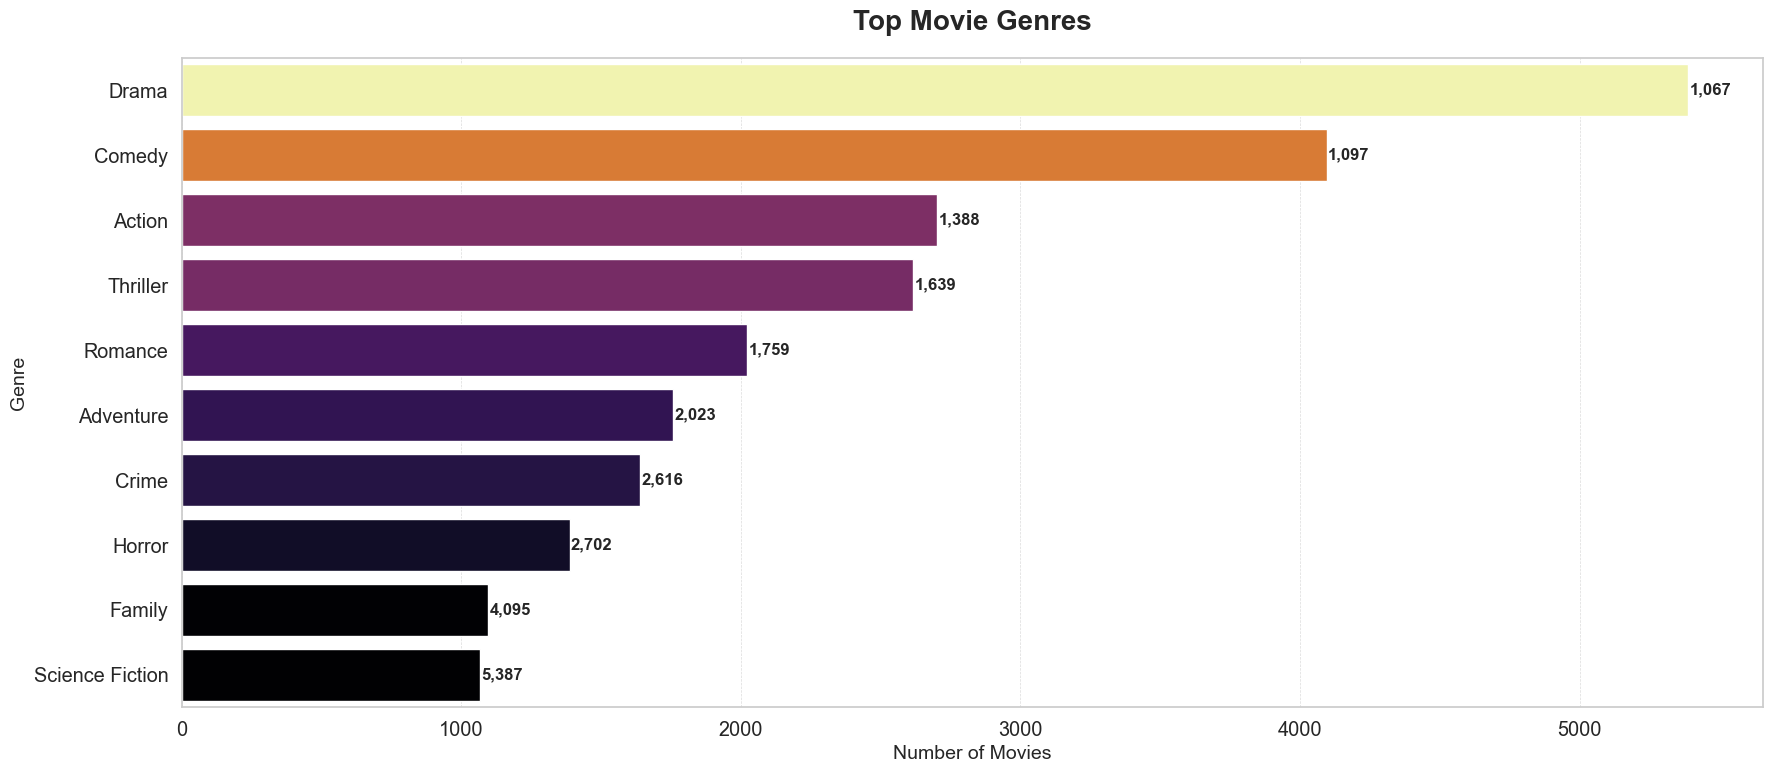

In [19]:
dfg = df1[df1['genres'].notna() & (df1['genres'] != '[]')].copy()
dfg['genre_list'] = dfg['genres'].apply(lambda x: [g.strip() for g in x.split(',') if g.strip() and g.strip().lower() != 'unknown'])
df_genres_exploded = dfg.explode('genre_list')

genre_counts = df_genres_exploded['genre_list'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)

barplot = sns.barplot(
    x='Count', 
    y='Genre',
    hue='Count',
    legend=False,
    data=genre_counts.head(10), 
    palette='inferno'
)

for bar, value in zip(barplot.patches, genre_counts['Count'].head(10)):
    plt.text(
        bar.get_width() + 5, 
        bar.get_y() + bar.get_height() / 2, 
        f"{value:,}", 
        va='center', 
        fontsize=12, 
        weight='bold'
    )

plt.title('Top Movie Genres', fontsize=20, weight='bold', pad=20)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Most Popular Genres from 1990 to 2025

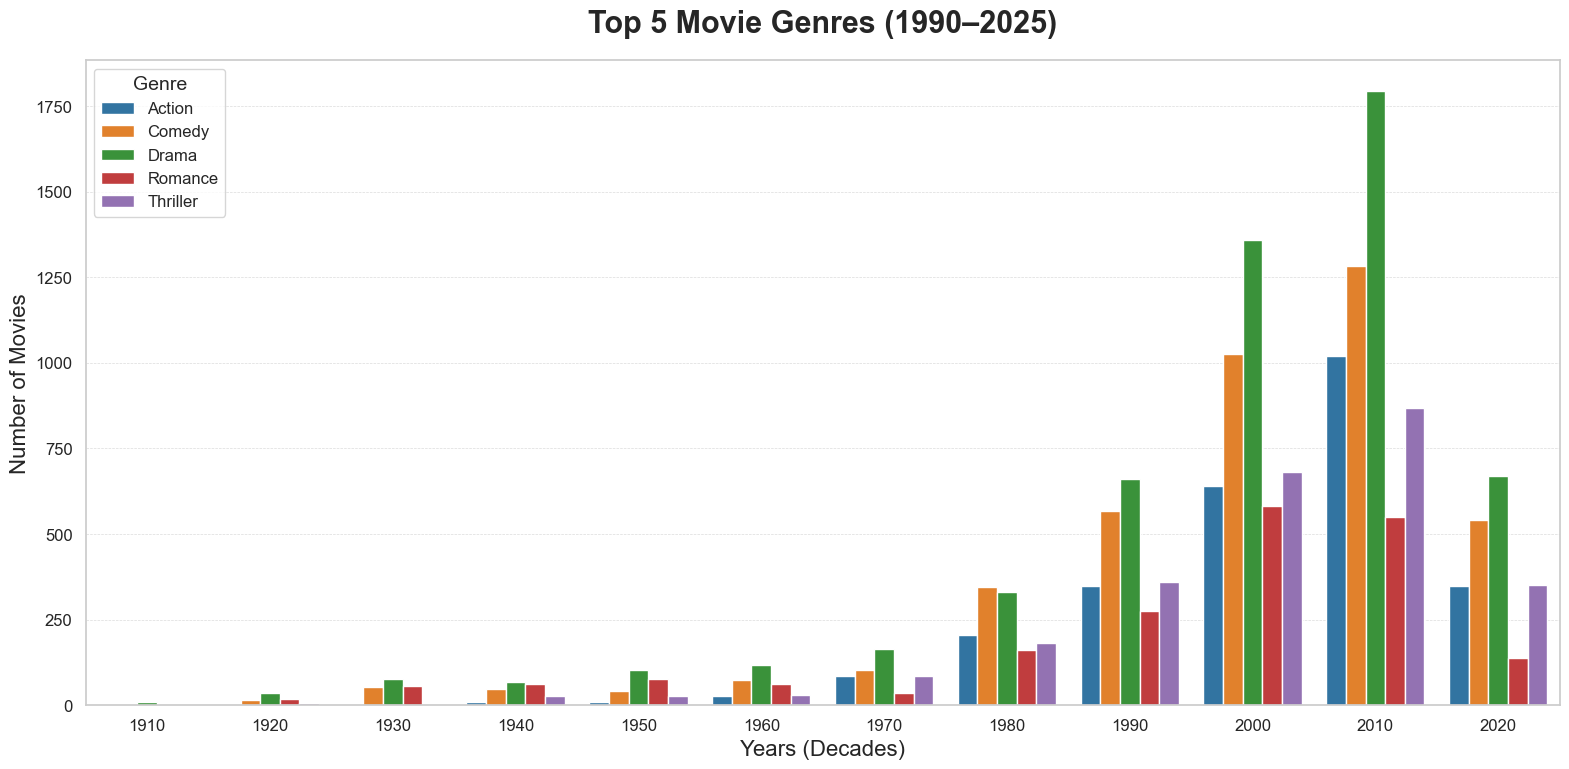

In [20]:
df1['year'] = df1['release_date'].dt.year

df_gy = df1[df1['year'].notna() & df1['genres'].notna() & (df1['genres'] != '[]')].copy()
df_gy['genre_list'] = df_gy['genres'].apply(lambda x: [g.strip() for g in x.split(',') if g.strip() and g.strip().lower() != 'unknown'])
df_genre_year_exploded = df_gy.explode('genre_list')
df_genre_year_exploded['decade'] = (df_genre_year_exploded['year'] // 10 * 10).astype(int)

top5_genres = df_genre_year_exploded['genre_list'].value_counts().head(5).index.tolist()
df_top_genres = df_genre_year_exploded[df_genre_year_exploded['genre_list'].isin(top5_genres)]

decade_genre_counts = (df_top_genres.groupby(['decade', 'genre_list']).size().reset_index(name='movie_count'))

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid", font_scale=1.4)

palette = sns.color_palette("tab10", n_colors=5)

sns.barplot(
    x='decade', 
    y='movie_count', 
    hue='genre_list', 
    data=decade_genre_counts, 
    palette=palette
)

plt.title('Top 5 Movie Genres (1990–2025)', fontsize=22, weight='bold', pad=20)
plt.xlabel('Years (Decades)', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Genre', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Rating Consistency Across Genres

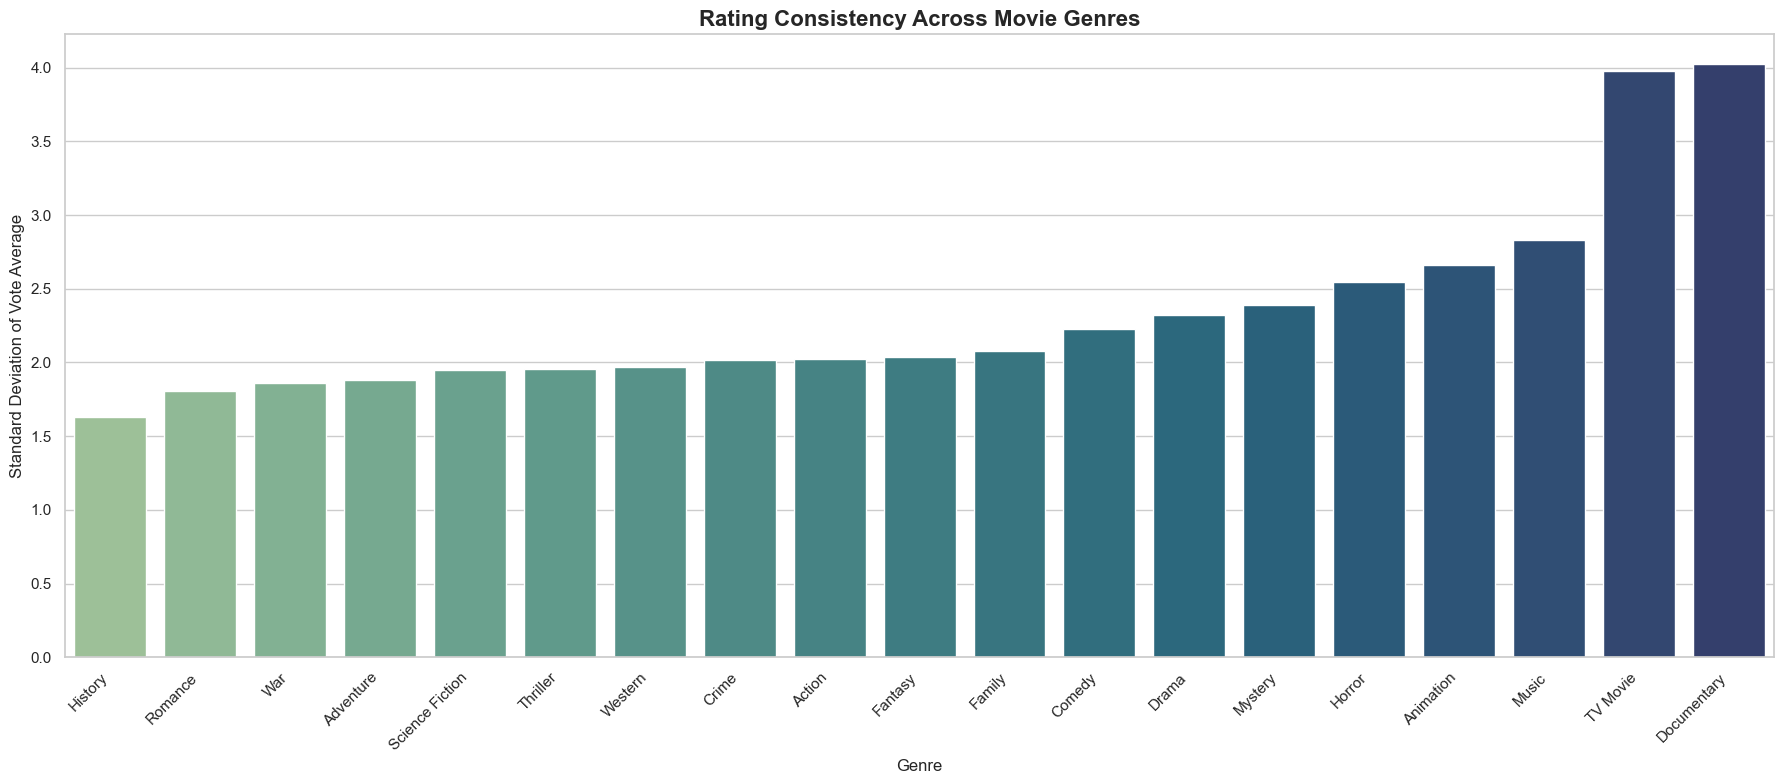

In [21]:
df1_exploded = df1.explode('genre_list')
df1_exploded = df1_exploded[df1_exploded['genre_list'] != '']

genre_rating_std = df1_exploded.groupby('genre_list')['vote_average'].std().sort_values().reset_index()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

sns.barplot(
    data=genre_rating_std,
    x='genre_list',
    y='vote_average',
    hue='genre_list',
    palette='crest',
    dodge=False,
    legend=False
)

plt.title('Rating Consistency Across Movie Genres', fontsize=16, weight='bold')
plt.ylabel('Standard Deviation of Vote Average', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Average Rating by Decade

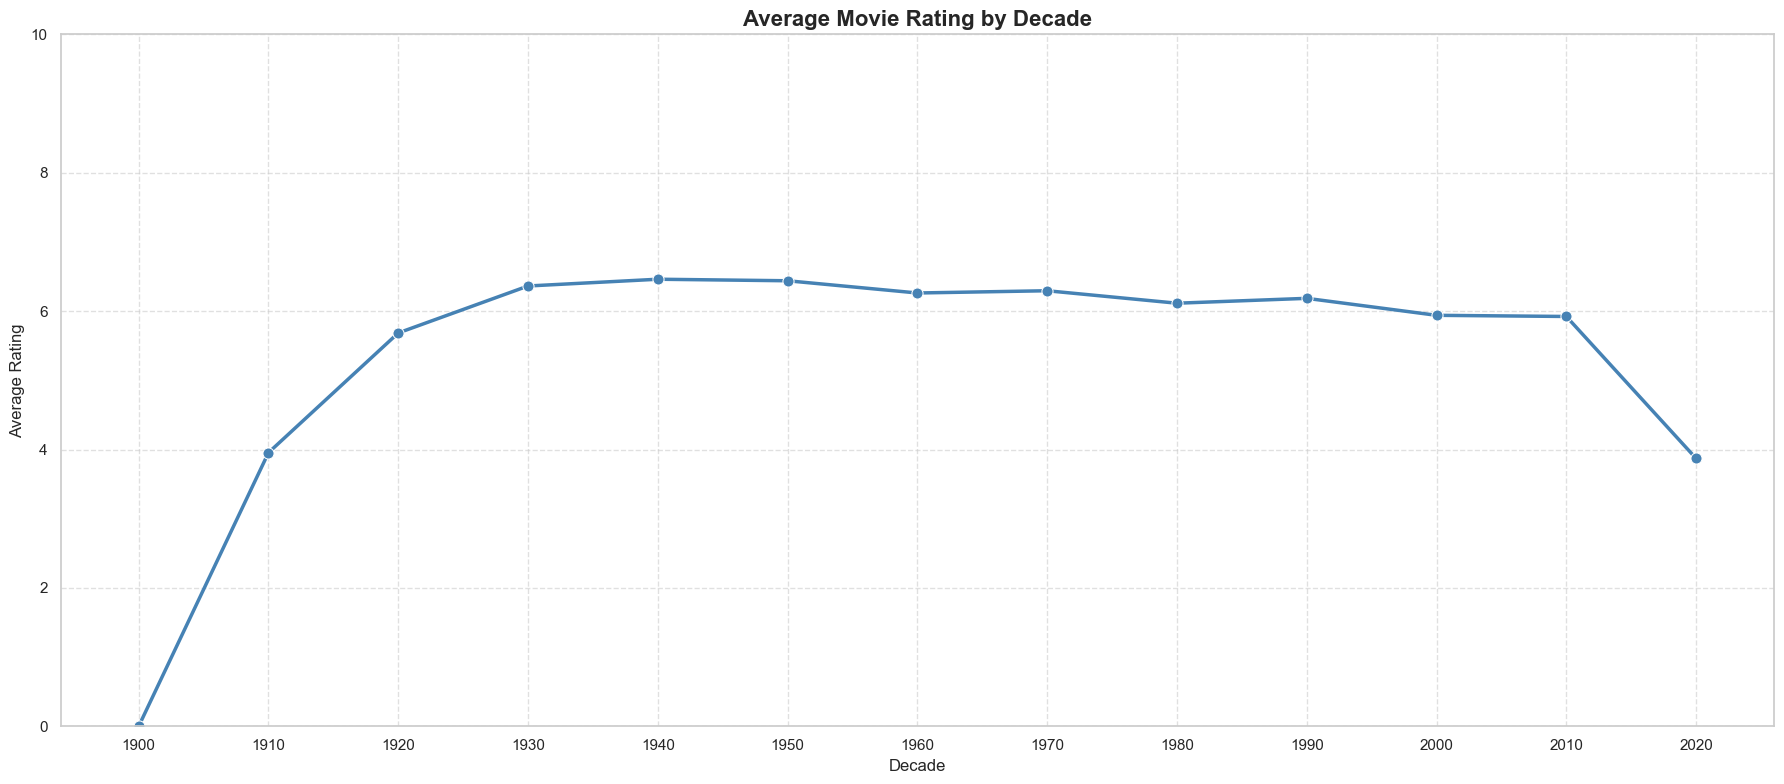

In [22]:
df1['decade'] = df1['year'].apply(lambda x: int(x // 10 * 10) if pd.notnull(x) else None)

decade_avg = df1.dropna(subset=['decade']).groupby('decade')['vote_average'].mean().reset_index()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

sns.lineplot(
    data=decade_avg,
    x='decade',
    y='vote_average',
    marker='o',
    color='steelblue',
    linewidth=2.5,
    markersize=8
)

plt.title('Average Movie Rating by Decade', fontsize=16, weight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(decade_avg['decade'])
plt.ylim(0, 10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Language Diversity Over Time

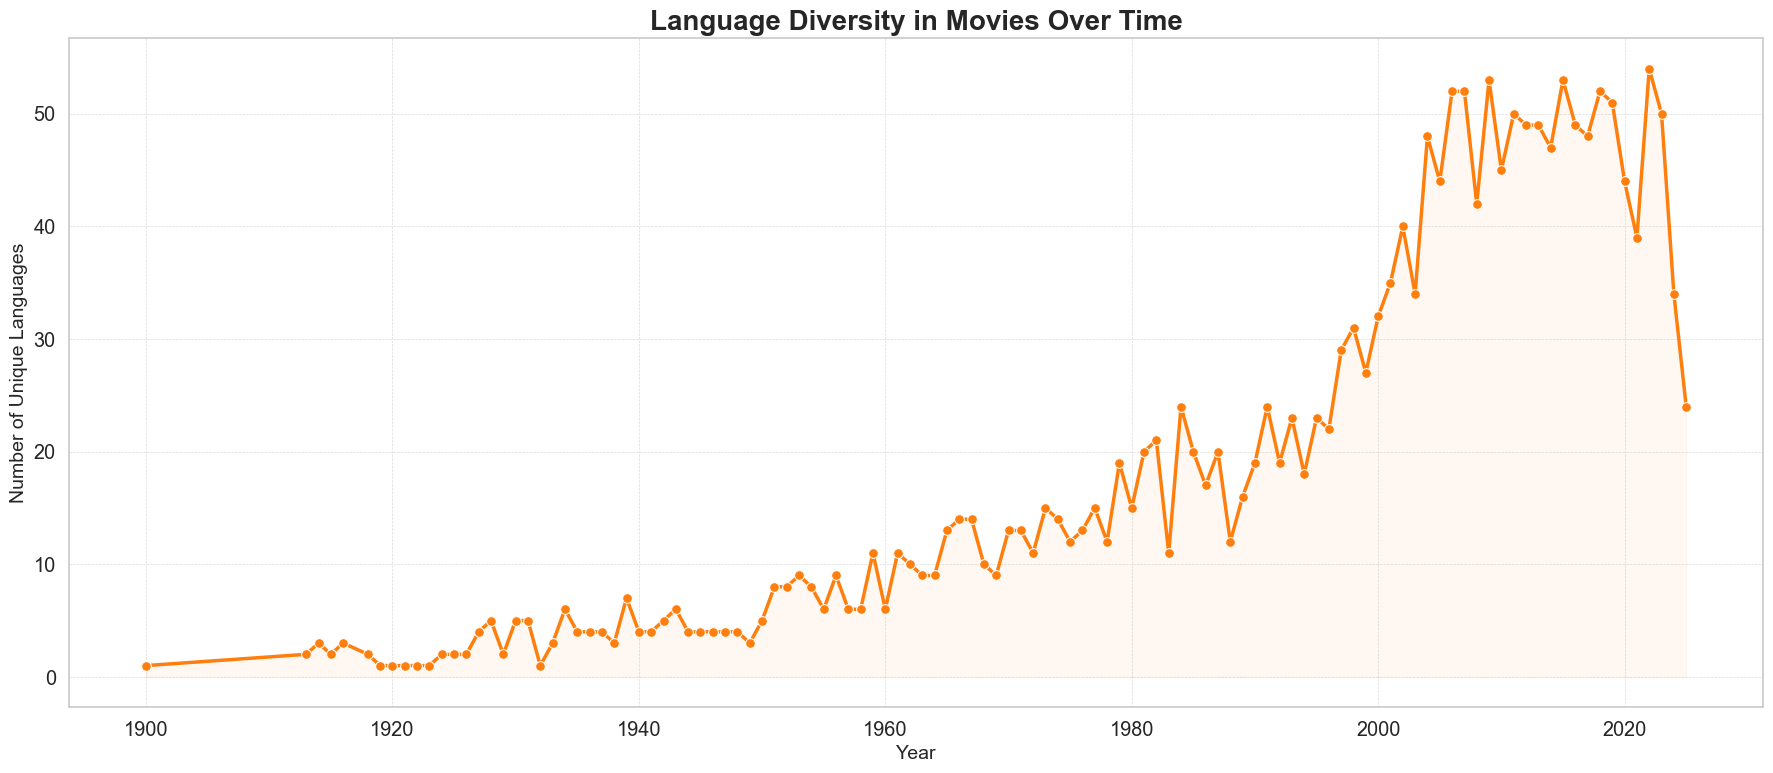

In [23]:

df_lang = df1[df1['year'].notna() & df1['spoken_languages'].notna()].copy()

def extract_languages(row):
    return [lang.strip() for lang in row.split(',') if lang.strip()]

df_lang['languages'] = df_lang['spoken_languages'].apply(extract_languages)
df_lang_exploded = df_lang.explode('languages')

lang_per_year = df_lang_exploded.groupby('year')['languages'].nunique().reset_index()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)

sns.lineplot(
    x='year', 
    y='languages', 
    data=lang_per_year, 
    linewidth=2.5, 
    marker='o', 
    markersize=7, 
    color='#ff7f0e'
)

plt.fill_between(lang_per_year['year'], lang_per_year['languages'], alpha=0.05, color='#ff7f0e')

plt.title('Language Diversity in Movies Over Time', fontsize=20, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Unique Languages', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


#### Cult Classics

In [24]:
df2 = df1[df1['vote_average'].notna() & df1['vote_count'].notna()].copy()

high_rating = 8.0
low_vote_count = df2['vote_count'].quantile(0.25)

cult_classics = df2[(df2['vote_average'] >= high_rating) & (df2['vote_count'] <= low_vote_count)]

columns_to_export = ['title', 'release_date', 'runtime', 'overview', 'vote_average']

cult_classics_full = cult_classics[columns_to_export].head(100)
cult_classics_full.to_csv("Cult Classics.csv", index=False)
print("File Saved!")

File Saved!


#### Hidden Gems

In [25]:
df3 = df1[df1['vote_average'].notna() & df1['revenue'].notna()].copy()

high_rating = 8.0
low_revenue = df3['revenue'].quantile(0.25)

hidden_gems = df3[(df3['vote_average'] >= high_rating) & (df3['revenue'] <= low_revenue)]

hidden_gems_full = cult_classics[columns_to_export].head(100)
hidden_gems_full.to_csv("Hidden Gems.csv", index=False)
print("File Saved!")

File Saved!


#### Average Rating: English vs Non-English

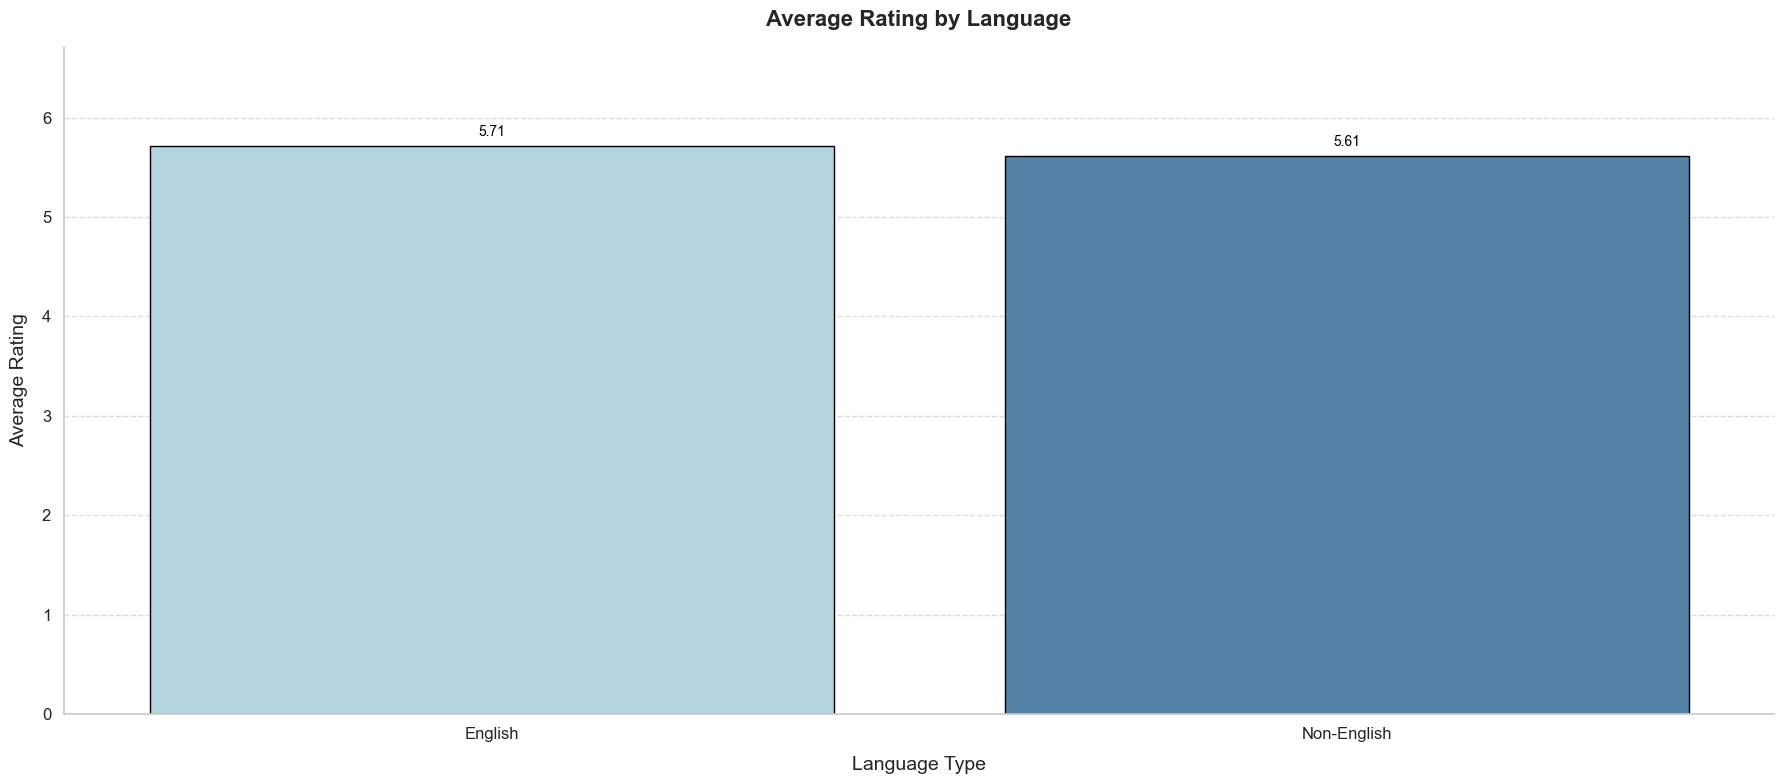

In [26]:
df4= df1[df1['revenue'].notna() & df1['vote_average'].notna() & df1['original_language'].notna() & (df1['original_language'] != '[]')].copy()
df4['language_type'] = df4['original_language'].apply(lambda x: 'English' if x.lower() == 'en' else 'Non-English')
df4['revenue_million'] = df4['revenue'] / 1_000_000

lang_summary = df4.groupby('language_type')[['revenue_million', 'vote_average']].mean().reset_index()
lang_summary['revenue_million'] = lang_summary['revenue_million'].round(2)
lang_summary['vote_average'] = lang_summary['vote_average'].round(2)

sns.set(style='whitegrid')
revenue_palette = ['mistyrose', 'firebrick']
rating_palette = ['lightblue', 'steelblue']

plt.figure(figsize=(18, 8))
ax1 = sns.barplot(
    data=lang_summary,
    x='language_type',
    y='vote_average',
    hue='language_type',
    legend=False,
    palette=rating_palette,
    edgecolor='black'
)

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=10,
                     color='black',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.title('Average Rating by Language', fontsize=16, weight='bold', pad=15)
plt.xlabel('Language Type', fontsize=14, labelpad=10)
plt.ylabel('Average Rating', fontsize=14, labelpad=10)
plt.ylim(0, lang_summary['vote_average'].max() + 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


#### Average Revenue: English vs Non-English

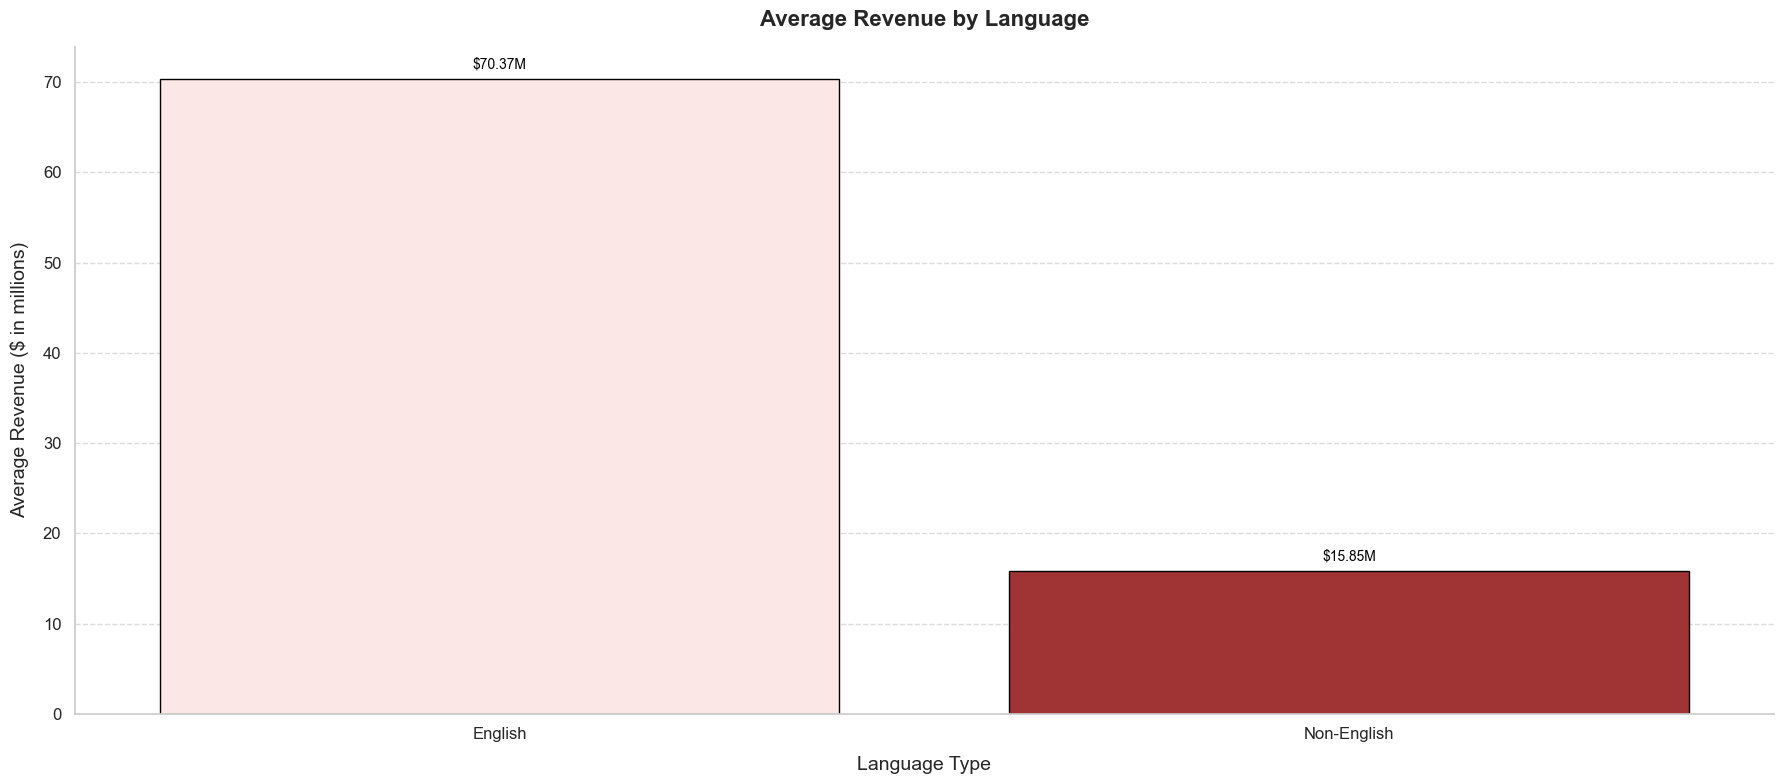

In [27]:
plt.figure(figsize=(18, 8))
ax2 = sns.barplot(
    data=lang_summary,
    x='language_type',
    y='revenue_million',
    hue='language_type',
    legend=False,
    palette=revenue_palette,
    edgecolor='black'
)

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f'${height:.2f}M',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=10,
                     color='black',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.title('Average Revenue by Language', fontsize=16, weight='bold', pad=15)
plt.xlabel('Language Type', fontsize=14, labelpad=10)
plt.ylabel('Average Revenue ($ in millions)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

#### Average Rating: Single vs Multi-Genre

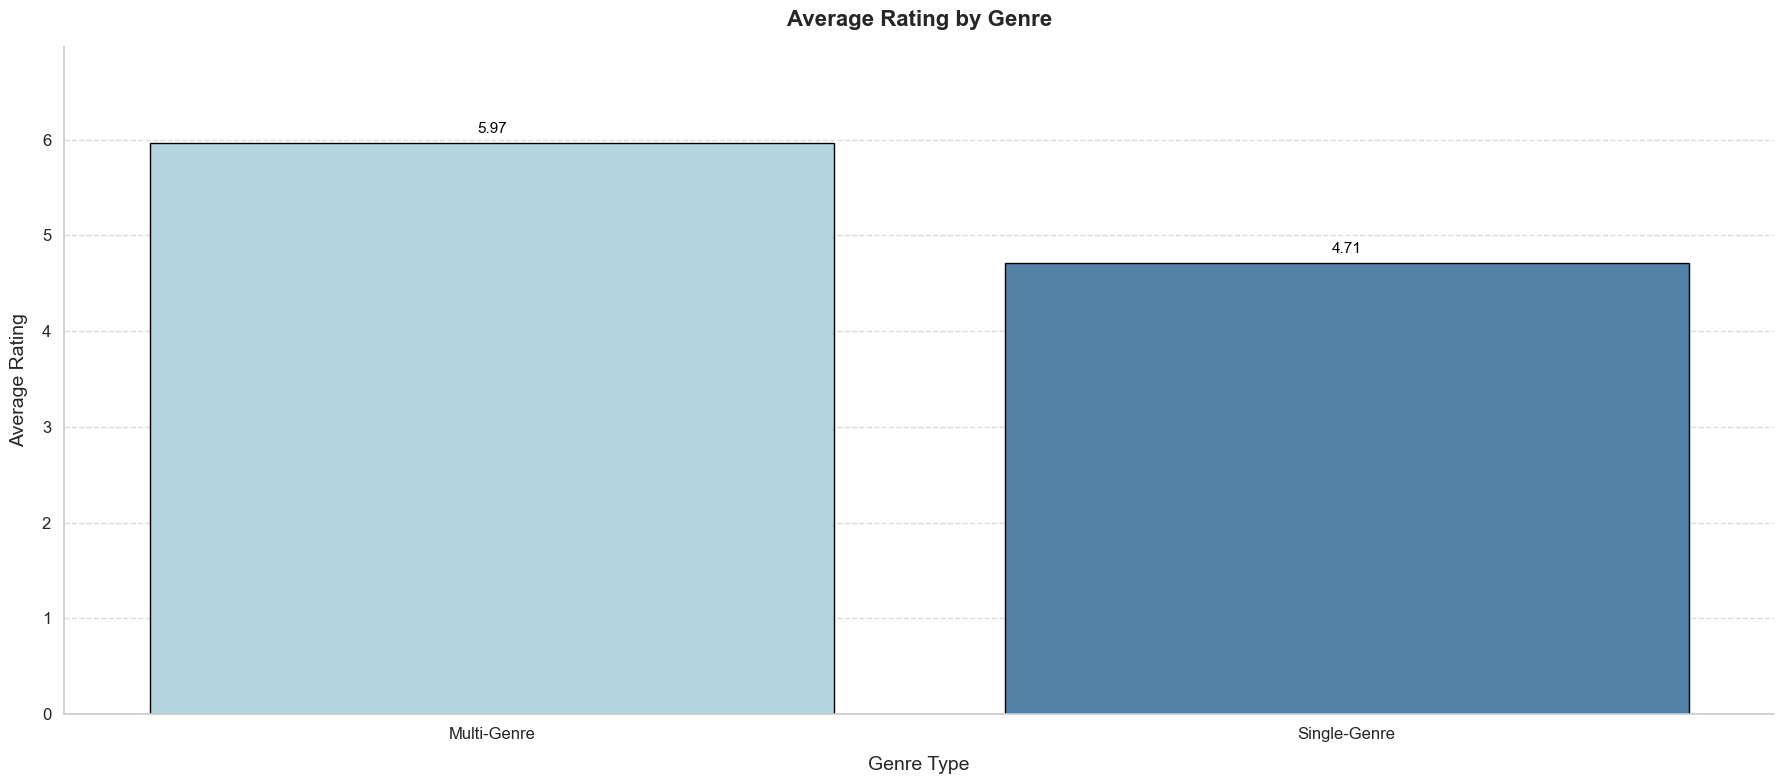

In [28]:
df5 = df1[df1['genres'].notna() & df1['vote_average'].notna() & df1['revenue'].notna()].copy()
df5['genre_count'] = df5['genres'].apply(lambda x: len(x.split(',')))
df5['genre_type'] = df5['genre_count'].apply(lambda x: 'Single-Genre' if x == 1 else 'Multi-Genre')

summary = df5.groupby('genre_type')[['vote_average', 'revenue']].mean().reset_index()

summary['revenue_million'] = summary['revenue'] / 1_000_000
summary['revenue_million'] = summary['revenue_million'].round(2)
summary['vote_average'] = summary['vote_average'].round(2)

sns.set(style='whitegrid')

palette_1 = sns.color_palette('Accent', 2)
palette_2 = sns.color_palette('BuPu', 2)

plt.figure(figsize=(18, 8))
ax1 = sns.barplot(
    data=summary,
    x='genre_type',
    y='vote_average',
    hue='genre_type',
    legend=False,
    palette=rating_palette,
    edgecolor='black'
)

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom',
                 fontsize=11,
                 color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Average Rating by Genre', fontsize=16, weight='bold', pad=15)
plt.xlabel('Genre Type', fontsize=14, labelpad=10)
plt.ylabel('Average Rating', fontsize=14, labelpad=10)
plt.ylim(0, summary['vote_average'].max() + 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()



#### Average Revenue: Single vs Multi-Genre

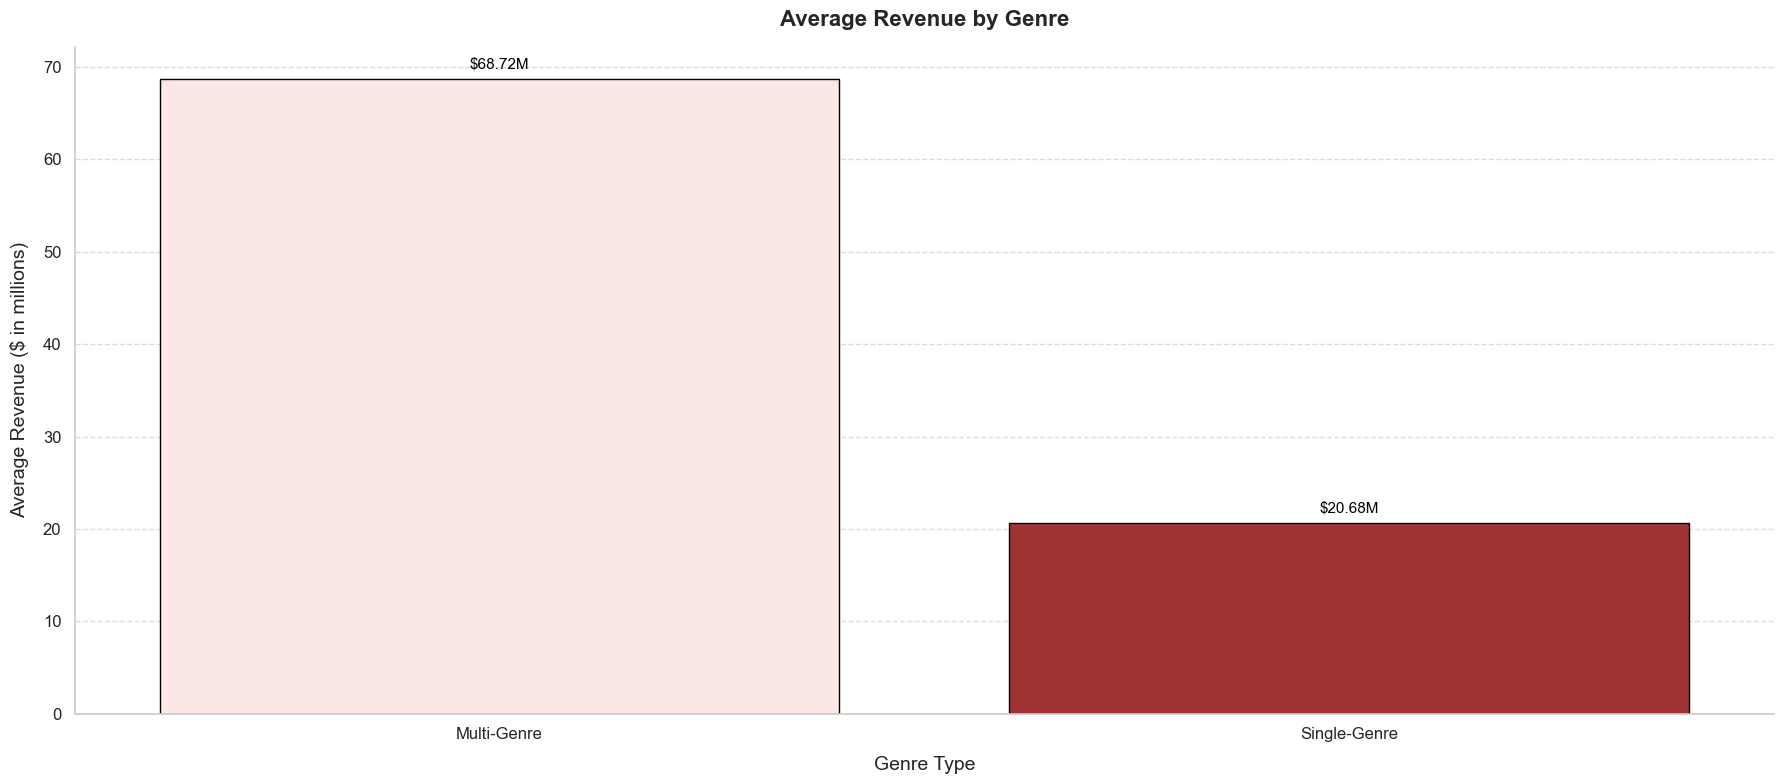

In [29]:
plt.figure(figsize=(18, 8))
ax2 = sns.barplot(
    data=summary,
    x='genre_type',
    y='revenue_million',
    hue='genre_type',
    legend=False,
    palette=revenue_palette,
    edgecolor='black'
)

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'${height:.2f}M',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom',
                 fontsize=11,
                 color='black',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.title('Average Revenue by Genre', fontsize=16, weight='bold', pad=15)
plt.xlabel('Genre Type', fontsize=14, labelpad=10)
plt.ylabel('Average Revenue ($ in millions)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

#### Proportion of Movies by Rating and Revenue Quadrants

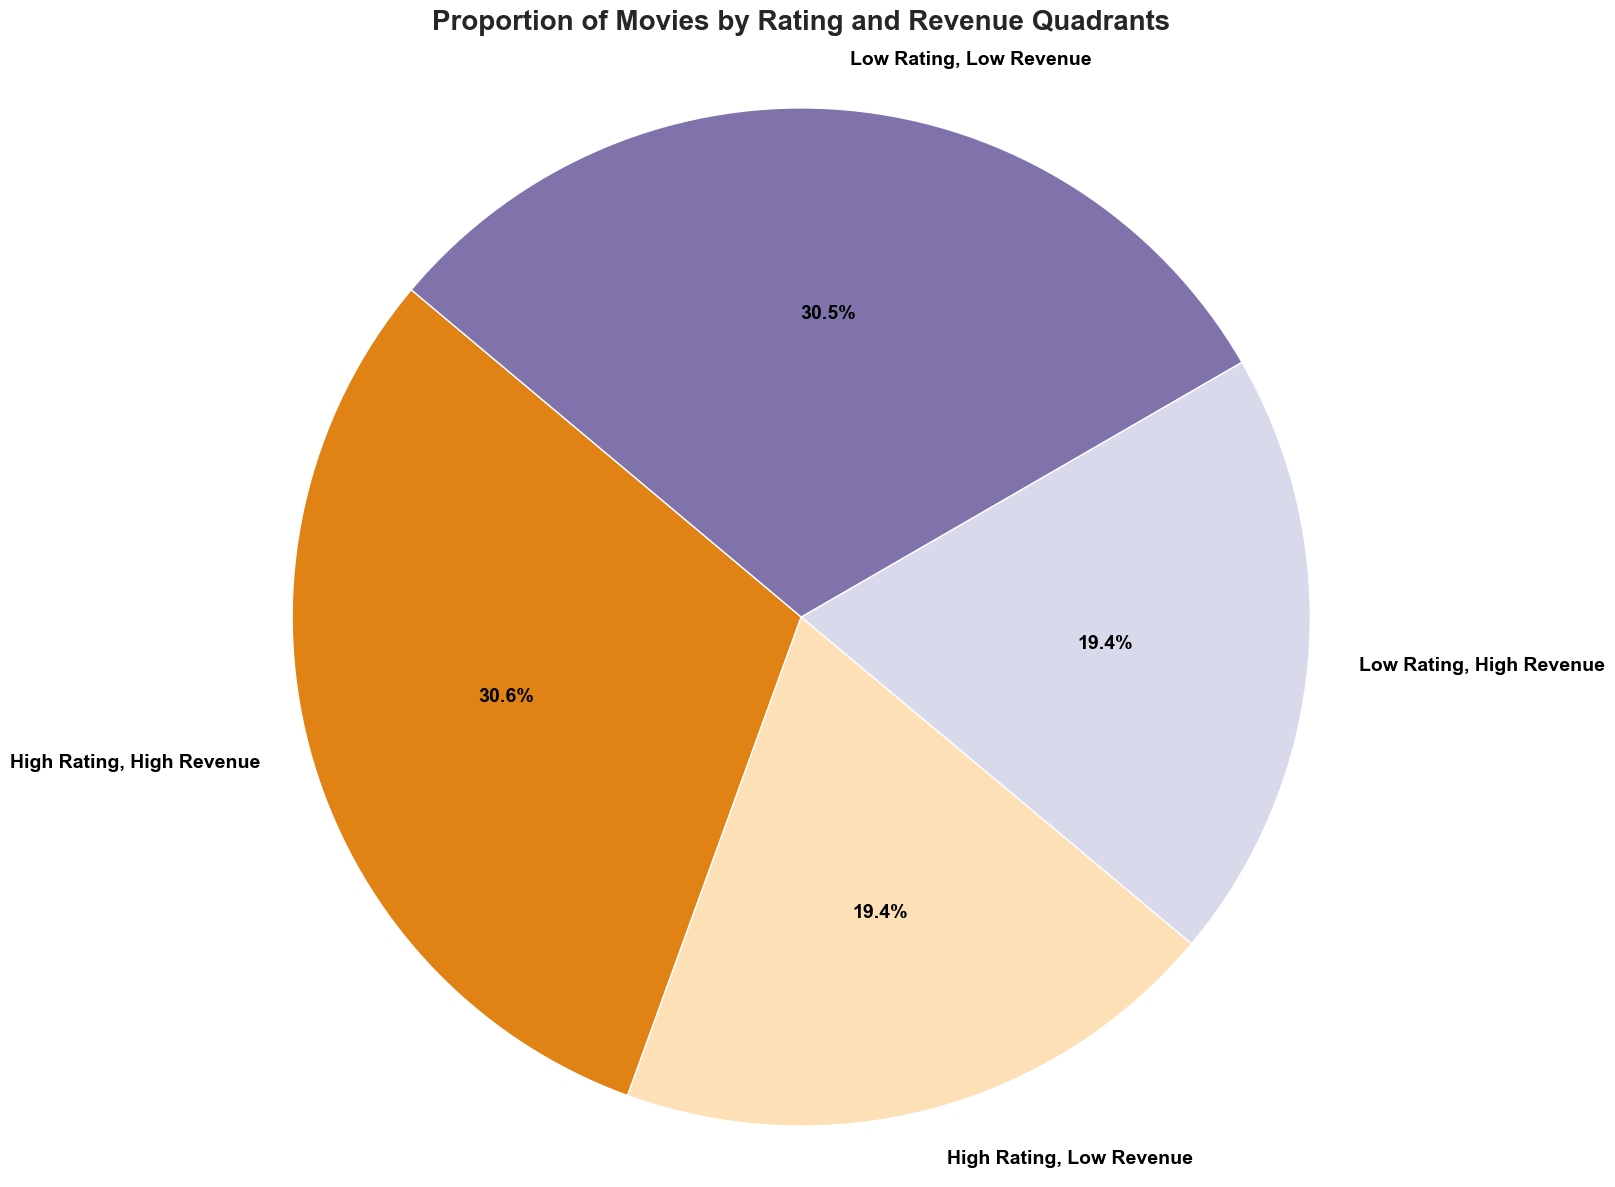

In [30]:
rating_median = df1['vote_average'].median()
revenue_median = df1['revenue'].median()

def classify_quadrant(row):
    if row['vote_average'] >= rating_median and row['revenue'] >= revenue_median:
        return 'High Rating, High Revenue'
    elif row['vote_average'] >= rating_median and row['revenue'] < revenue_median:
        return 'High Rating, Low Revenue'
    elif row['vote_average'] < rating_median and row['revenue'] >= revenue_median:
        return 'Low Rating, High Revenue'
    else:
        return 'Low Rating, Low Revenue'

df1['quadrant'] = df1.apply(classify_quadrant, axis=1)

quadrant_order = ['High Rating, High Revenue', 'High Rating, Low Revenue', 'Low Rating, High Revenue', 'Low Rating, Low Revenue']
quadrant_counts = df1['quadrant'].value_counts().reindex(quadrant_order)

plt.figure(figsize=(14, 14))

colors = sns.color_palette('PuOr', 4)

wedges, texts, autotexts = plt.pie(
    quadrant_counts,
    labels=quadrant_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14, 'weight': 'bold', 'color': 'black'}
)

for text in texts:
    text.set_fontsize(14)
    text.set_weight('bold')

plt.title('Proportion of Movies by Rating and Revenue Quadrants', fontsize=20, weight='bold', pad=20)
plt.axis('equal')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

#### Revenue Trends Over Time

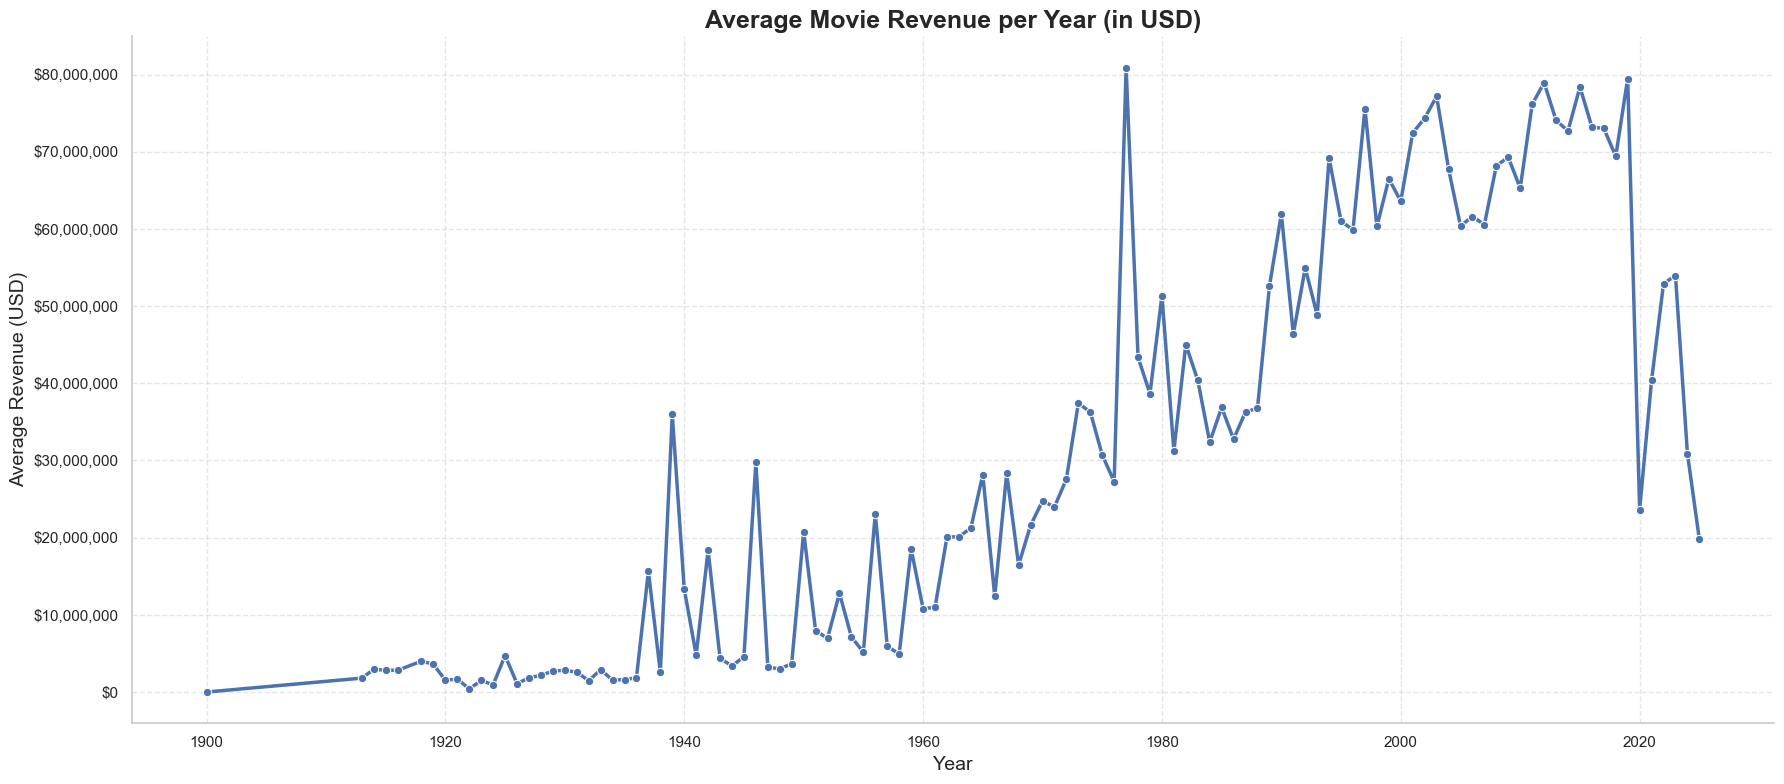

In [31]:
df6 = df1[df1['year'].notna() & df1['revenue'].notna()].copy()
revenue_by_year = df6.groupby('year')['revenue'].mean().reset_index()

sns.set_theme(style="whitegrid", palette="deep")

plt.figure(figsize=(18, 8))
sns.lineplot(x='year', y='revenue', data=revenue_by_year, marker='o', linewidth=2.5)

plt.title('Average Movie Revenue per Year (in USD)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Revenue (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

#### Revenue vs Runtime

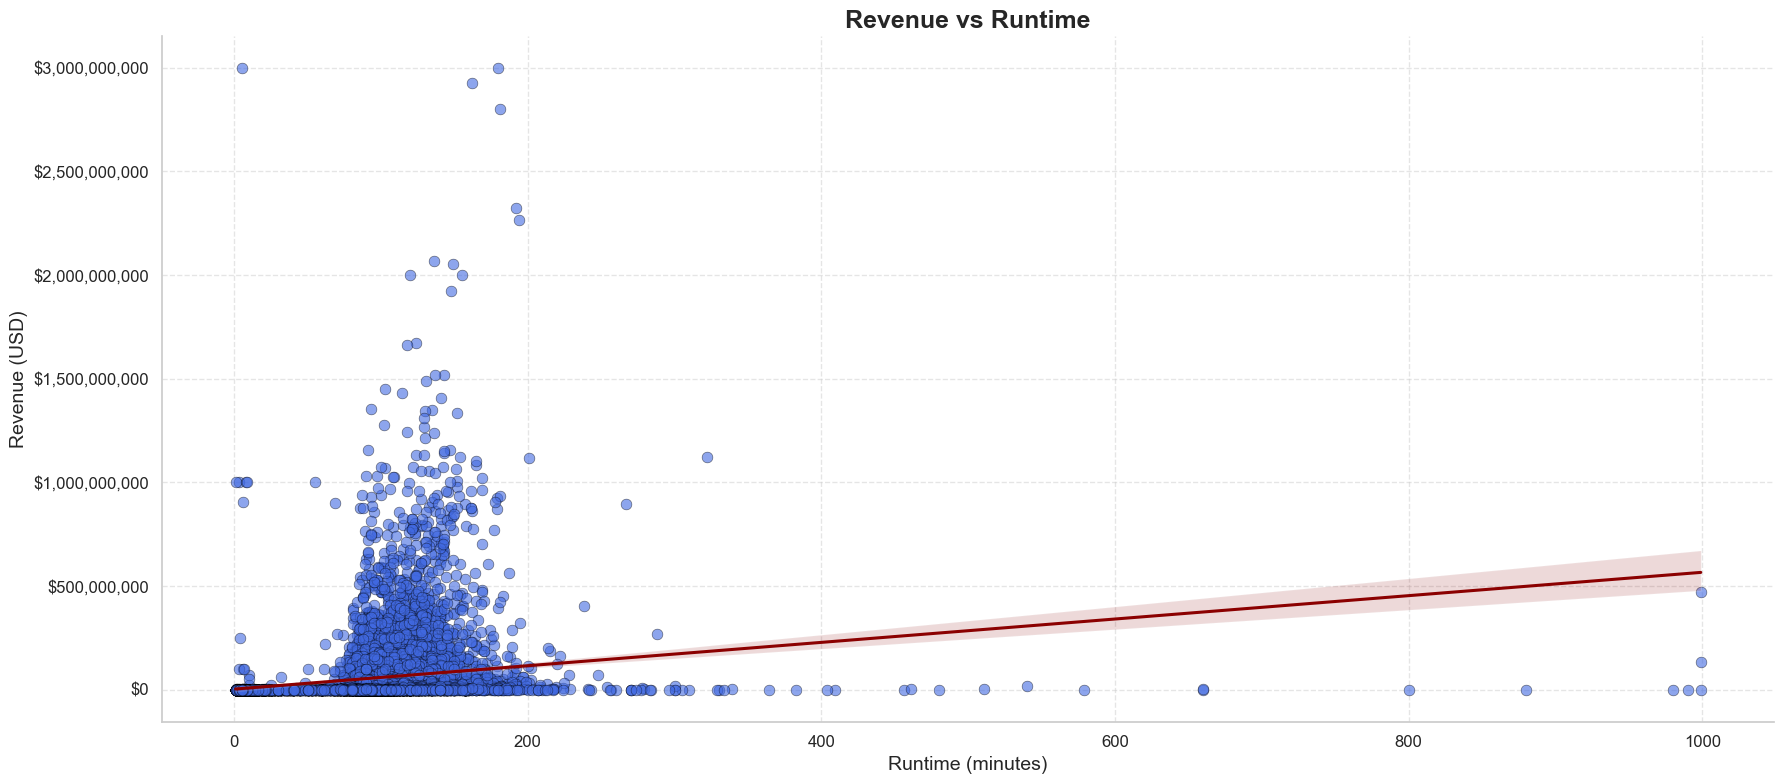

In [32]:
df7 = df1[df1['runtime'].notna() & df1['revenue'].notna()].copy()

sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(18, 8))
sns.regplot(
    data=df7,
    x='runtime',
    y='revenue',
    scatter_kws={
        'alpha': 0.6,
        's': 60,
        'edgecolor': 'black',
        'linewidths': 0.4
    },
    line_kws={
        'color': 'darkred',
        'linewidth': 2.2
    },
    color='royalblue'
)

plt.title('Revenue vs Runtime', fontsize=18, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()

plt.tight_layout()
plt.show()

#### Revenue vs Average Vote

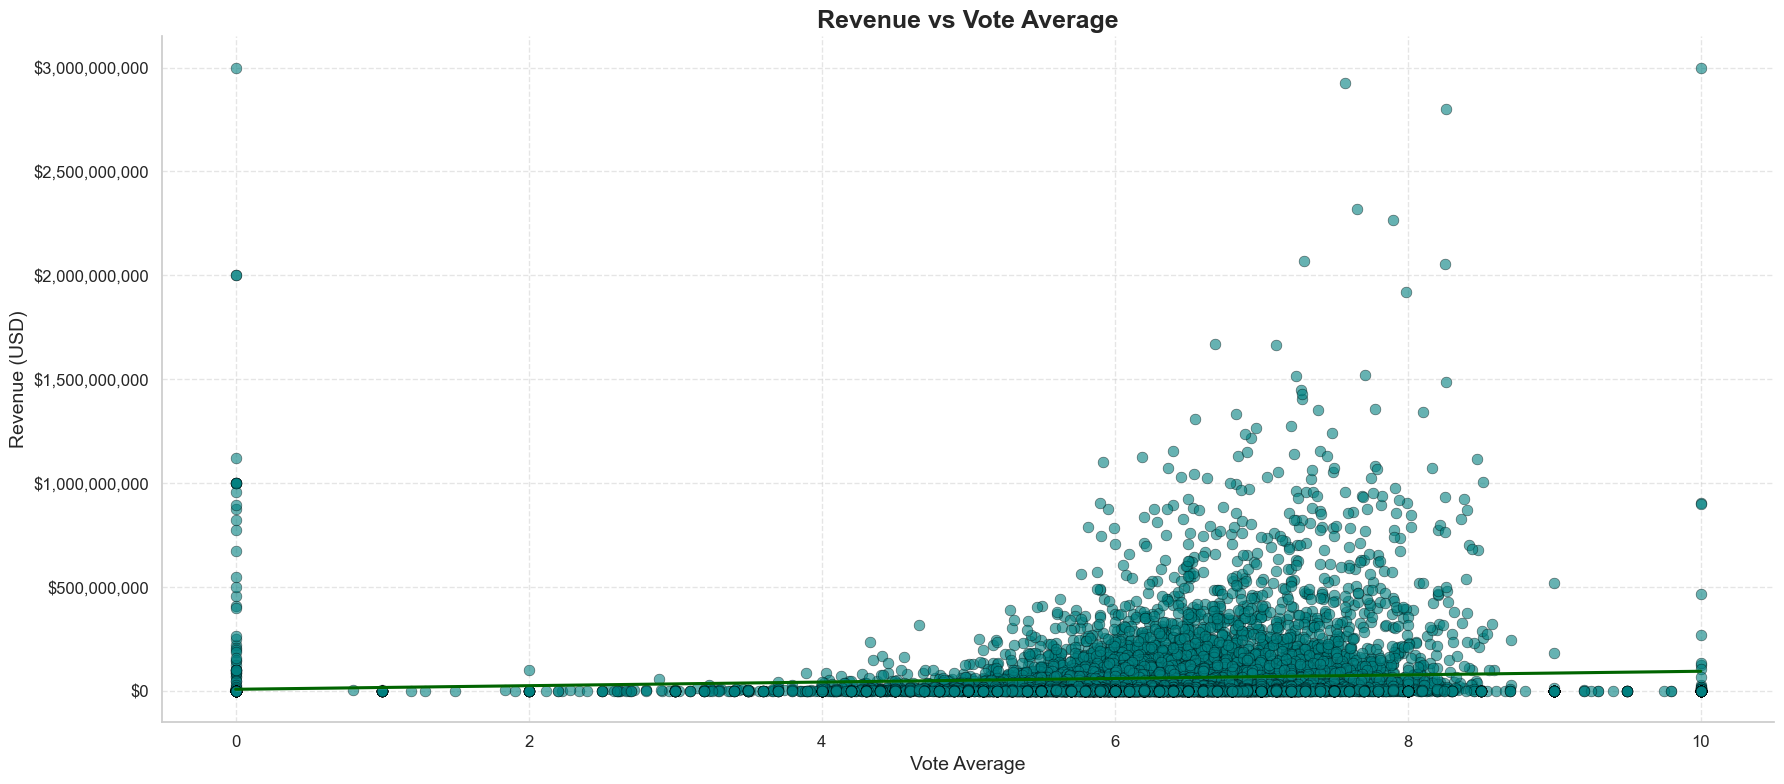

In [33]:
df8 = df1[df1['vote_average'].notna() & df1['revenue'].notna()].copy()

sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(18, 8))
sns.regplot(
    data=df8,
    x='vote_average',
    y='revenue',
    scatter_kws={
        'alpha': 0.6,
        's': 60,
        'edgecolor': 'black',
        'linewidths': 0.4
    },
    line_kws={
        'color': 'darkgreen',
        'linewidth': 2.2
    },
    color='teal'
)

plt.title('Revenue vs Vote Average', fontsize=18, fontweight='bold')
plt.xlabel('Vote Average', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()

plt.tight_layout()
plt.show()

#### Revenue by Budget Tiers

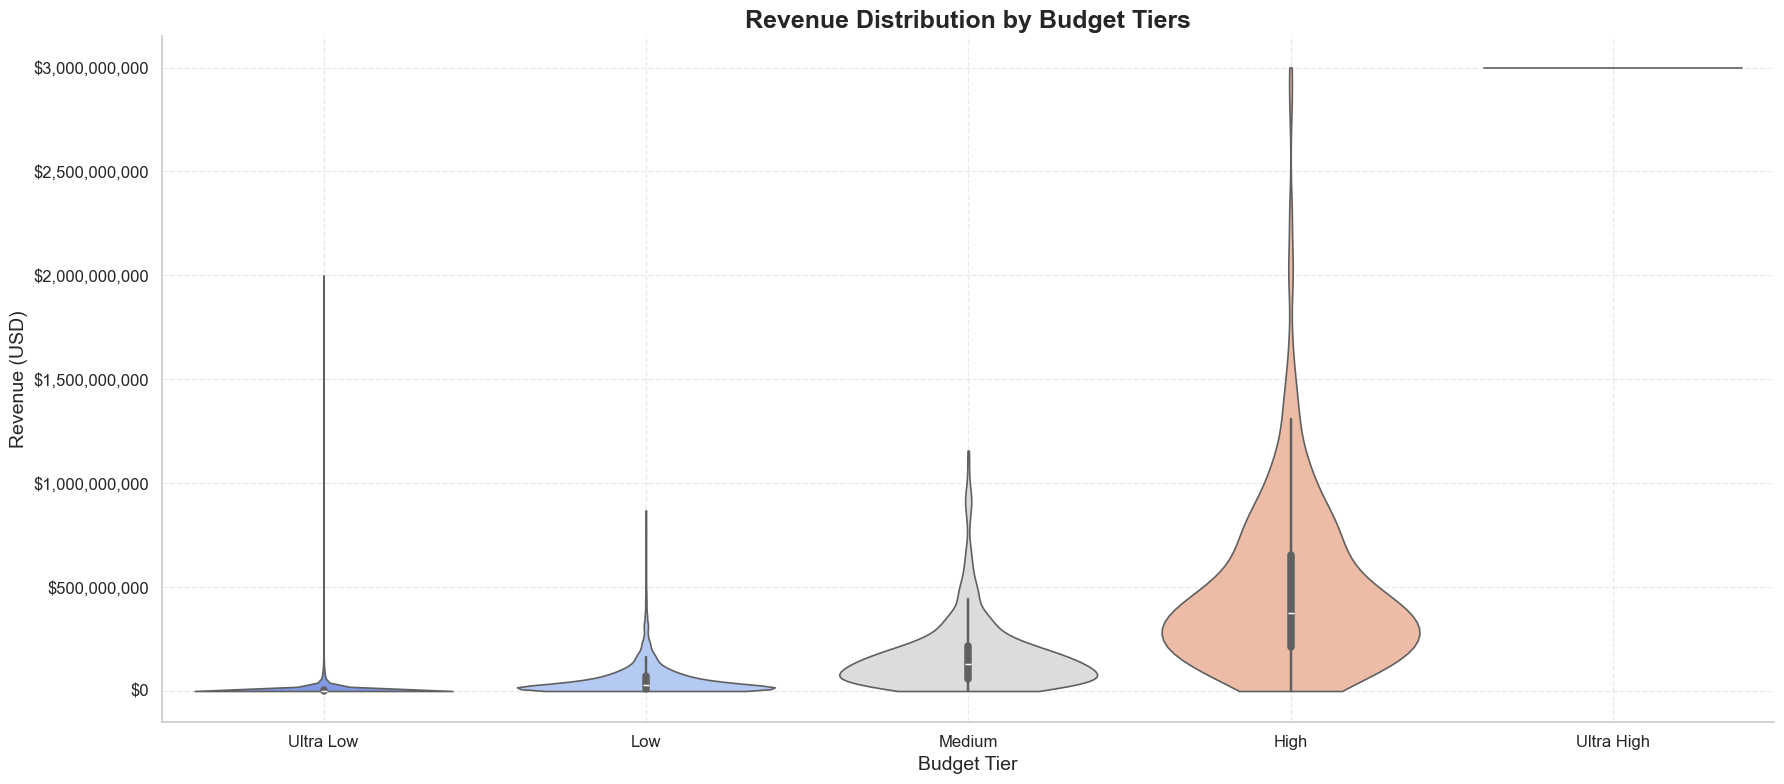

In [34]:
df9 = df1[df1['budget'].notna() & df1['revenue'].notna()].copy()

bins = [0, 10_000_000, 50_000_000, 100_000_000, 500_000_000, float('inf')]
labels = ['Ultra Low', 'Low', 'Medium', 'High', 'Ultra High']
df9['budget_tier'] = pd.cut(df9['budget'], bins=bins, labels=labels, right=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 8))
sns.violinplot(
    data=df9,
    x='budget_tier',
    y='revenue',
    hue='budget_tier',
    legend=False,
    palette='coolwarm',
    inner='box', 
    linewidth=1.2,
    cut=0 
)

plt.title('Revenue Distribution by Budget Tiers', fontsize=18, fontweight='bold')
plt.xlabel('Budget Tier', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine()

plt.tight_layout()
plt.show()

#### Correlation between Runtime and Rating by Genre

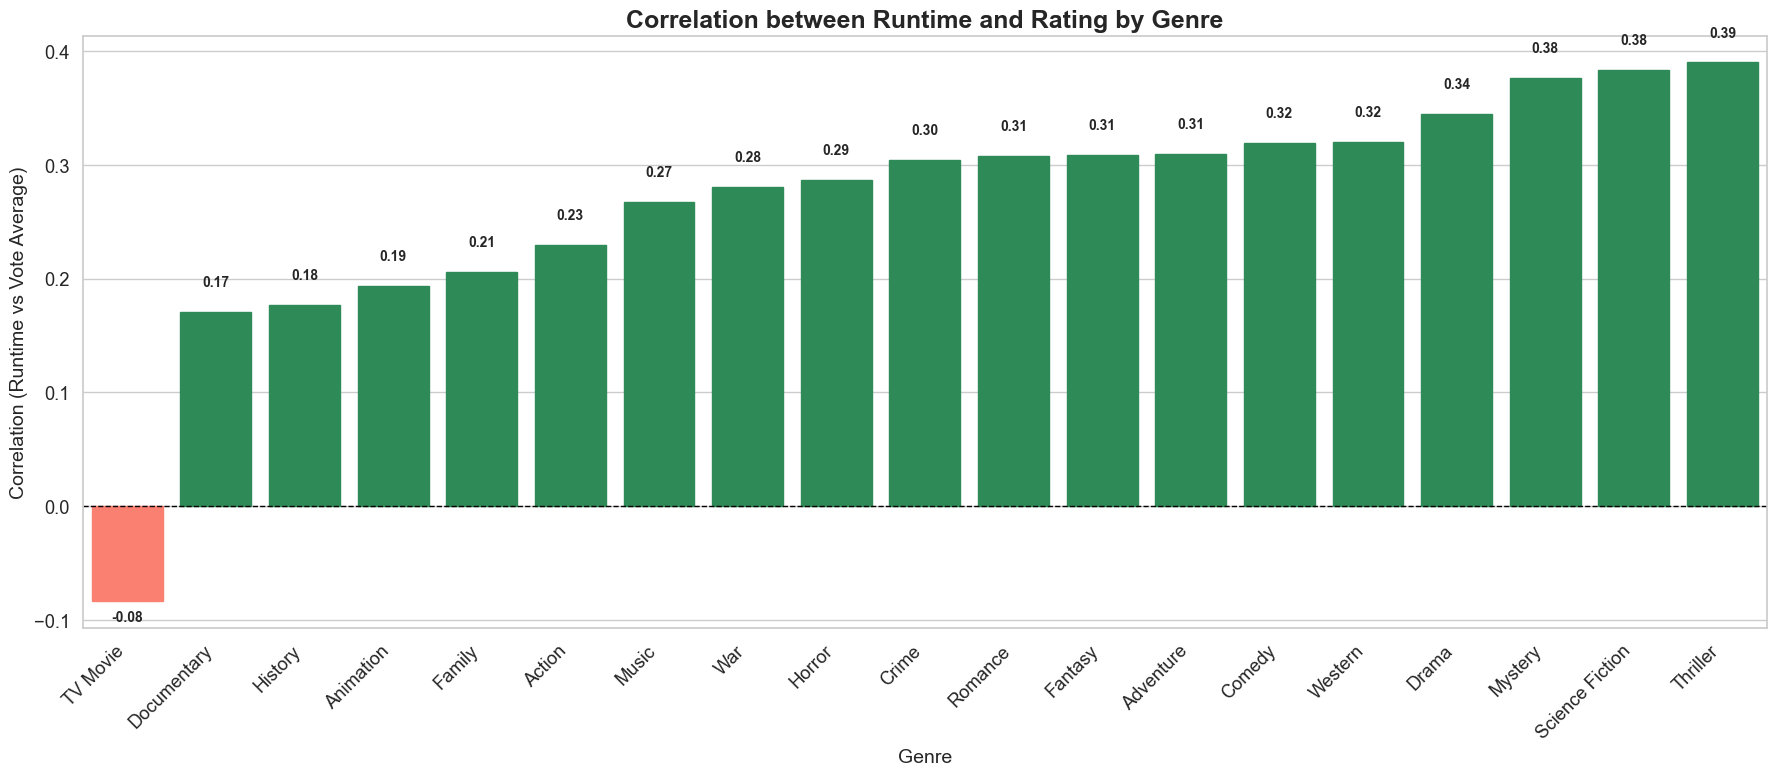

In [35]:
correlations = {}
for genre, group in df1_exploded.groupby('genre_list'):
    if len(group) >= 10:
        corr = group['runtime'].corr(group['vote_average'])
        correlations[genre] = corr

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation')

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.2)

bars = sns.barplot(
    x=correlation_df.index, 
    y='Correlation', 
    data=correlation_df.reset_index(), 
    color='lightgray'
)

for bar, corr in zip(bars.patches, correlation_df['Correlation']):
    bar.set_color('salmon' if corr < 0 else 'seagreen')
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.02 * (1 if corr >= 0 else -1), 
        f"{corr:.2f}", 
        ha='center', va='bottom', fontsize=10, weight='bold'
    )

plt.title('Correlation between Runtime and Rating by Genre', fontsize=18, weight='bold')
plt.ylabel('Correlation (Runtime vs Vote Average)', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

#### Runtime Trends Over Time

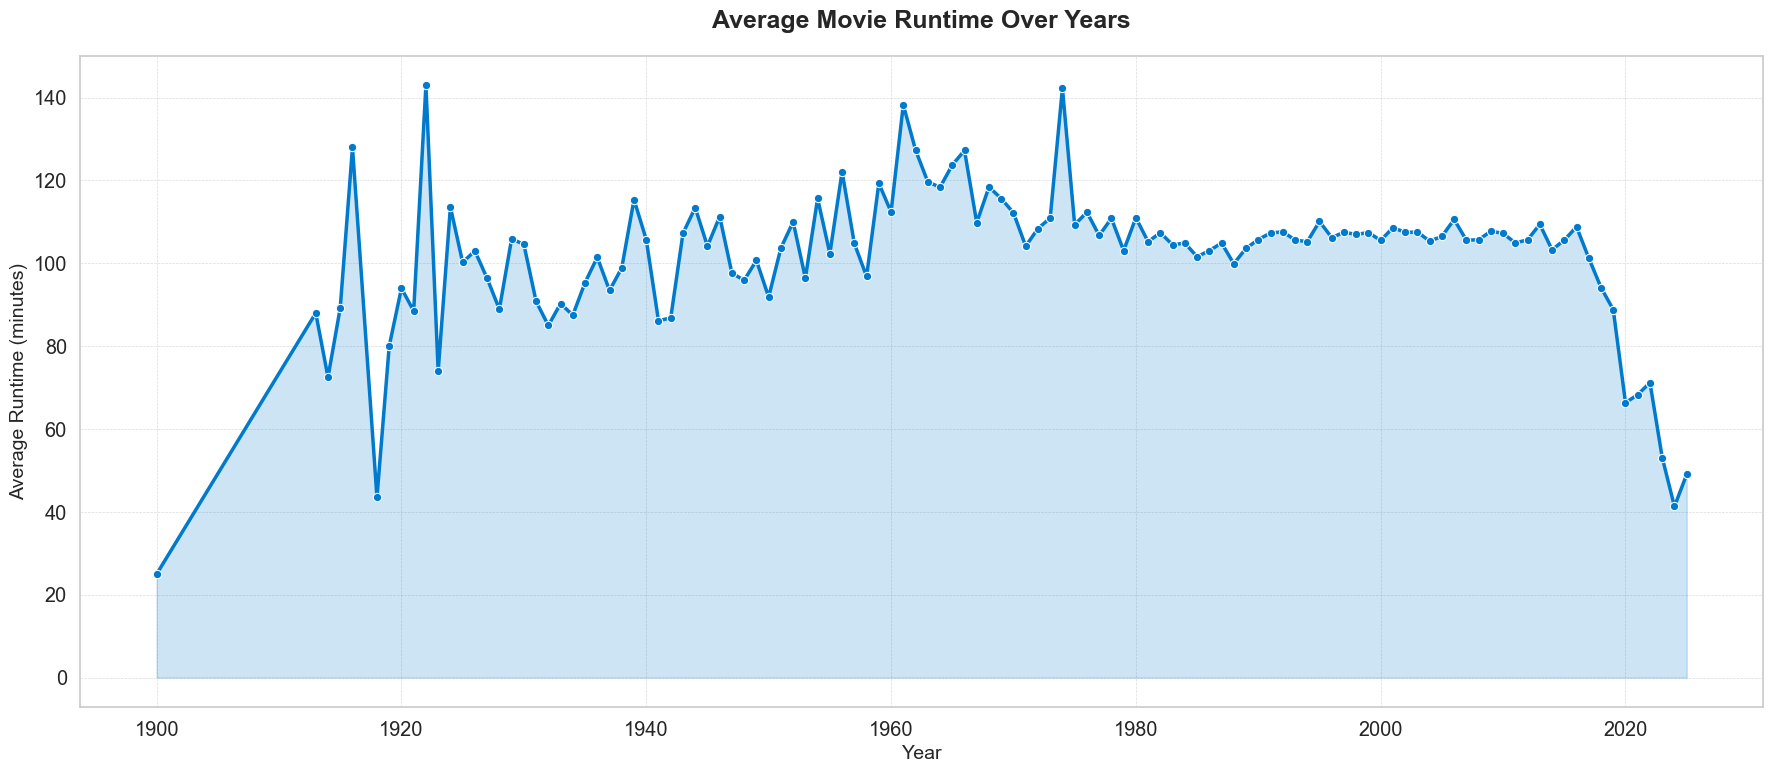

In [36]:
df10 = df1[df1['year'].notna() & df1['runtime'].notna()].copy()
runtime_by_year = df10.groupby('year')['runtime'].mean().reset_index()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)
sns.lineplot(
    x='year', 
    y='runtime', 
    data=runtime_by_year, 
    linewidth=2.5, 
    marker='o', 
    markersize=6, 
    color='#007acc'
)

plt.fill_between(runtime_by_year['year'], runtime_by_year['runtime'], alpha=0.2, color='#007acc')
plt.title('Average Movie Runtime Over Years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Runtime (minutes)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

#### Top 10 Studios by Total Revenue

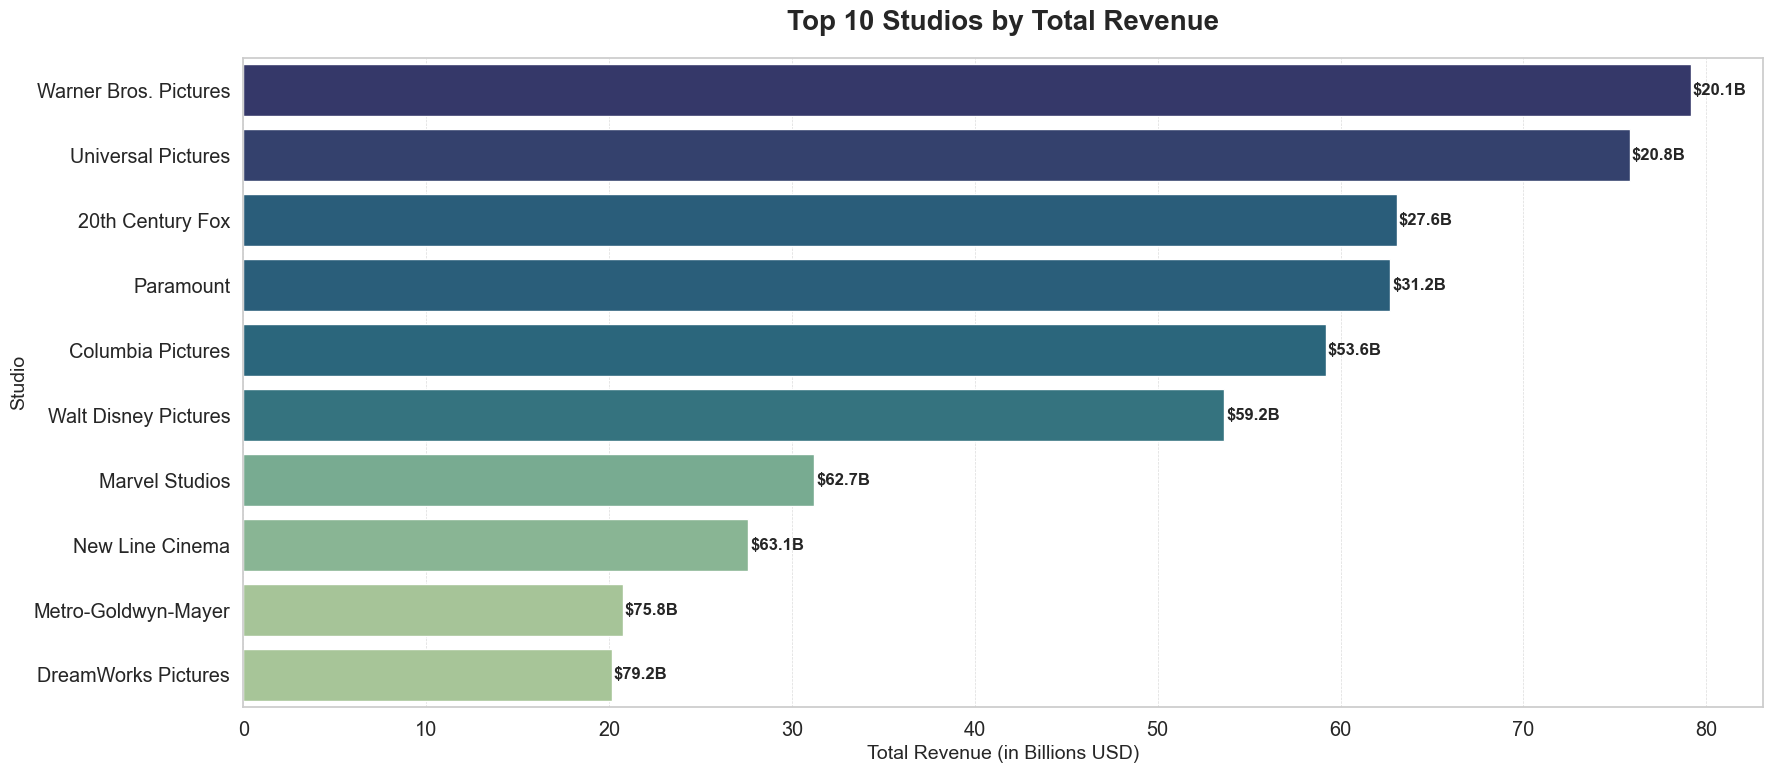

In [37]:
df11 = df1[df1['production_companies'].notna() & df1['revenue'].notna()].copy()
df11['companies'] = df11['production_companies'].apply(lambda x: [c.strip() for c in x.split(',') if c.strip()])
df_exploded = df11.explode('companies')
studio_revenue = df_exploded.groupby('companies')['revenue'].sum().sort_values(ascending=False).reset_index()
top10 = studio_revenue.head(10).copy()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)

top10['revenue_billion'] = top10['revenue'] / 1e9

barplot = sns.barplot(
    x='revenue_billion', 
    y='companies',
    hue='revenue_billion',
    legend=False,
    data=top10, 
    palette='crest'
)

for bar, value in zip(barplot.patches, top10['revenue_billion']):
    plt.text(
        bar.get_width() + 0.1, 
        bar.get_y() + bar.get_height()/2, 
        f"${value:.1f}B", 
        va='center', 
        fontsize=12, 
        weight='bold'
    )

plt.title('Top 10 Studios by Total Revenue', fontsize=20, weight='bold', pad=20)
plt.xlabel('Total Revenue (in Billions USD)', fontsize=14)
plt.ylabel('Studio', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

#### Top 10 Studios by Number of Movies

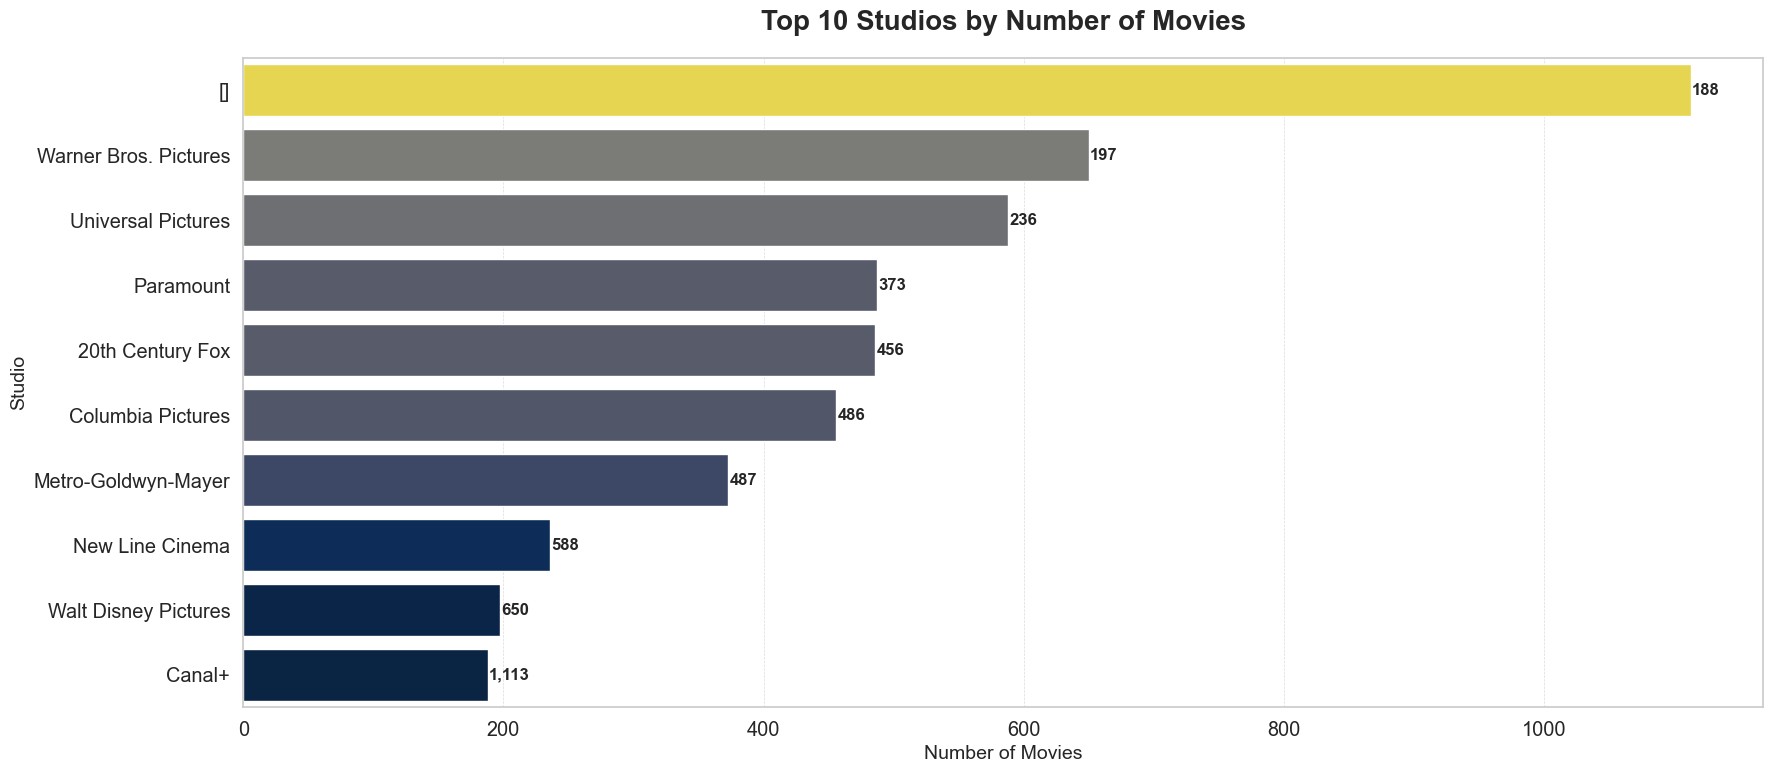

In [38]:
studio_movie_count = df_exploded['companies'].value_counts().reset_index()
studio_movie_count.columns = ['Studio', 'Movie_Count']

top10_count = studio_movie_count.head(10)

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)

barplot = sns.barplot(
    x='Movie_Count', 
    y='Studio',
    hue='Movie_Count',
    legend=False,
    data=top10_count, 
    palette='cividis'
)

for bar, value in zip(barplot.patches, top10_count['Movie_Count']):
    plt.text(
        bar.get_width() + 1, 
        bar.get_y() + bar.get_height() / 2, 
        f"{value:,}",
        va='center', 
        fontsize=12, 
        weight='bold'
    )

plt.title('Top 10 Studios by Number of Movies', fontsize=20, weight='bold', pad=20)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Studio', fontsize=14)

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

#### Top 10 Producing Countries

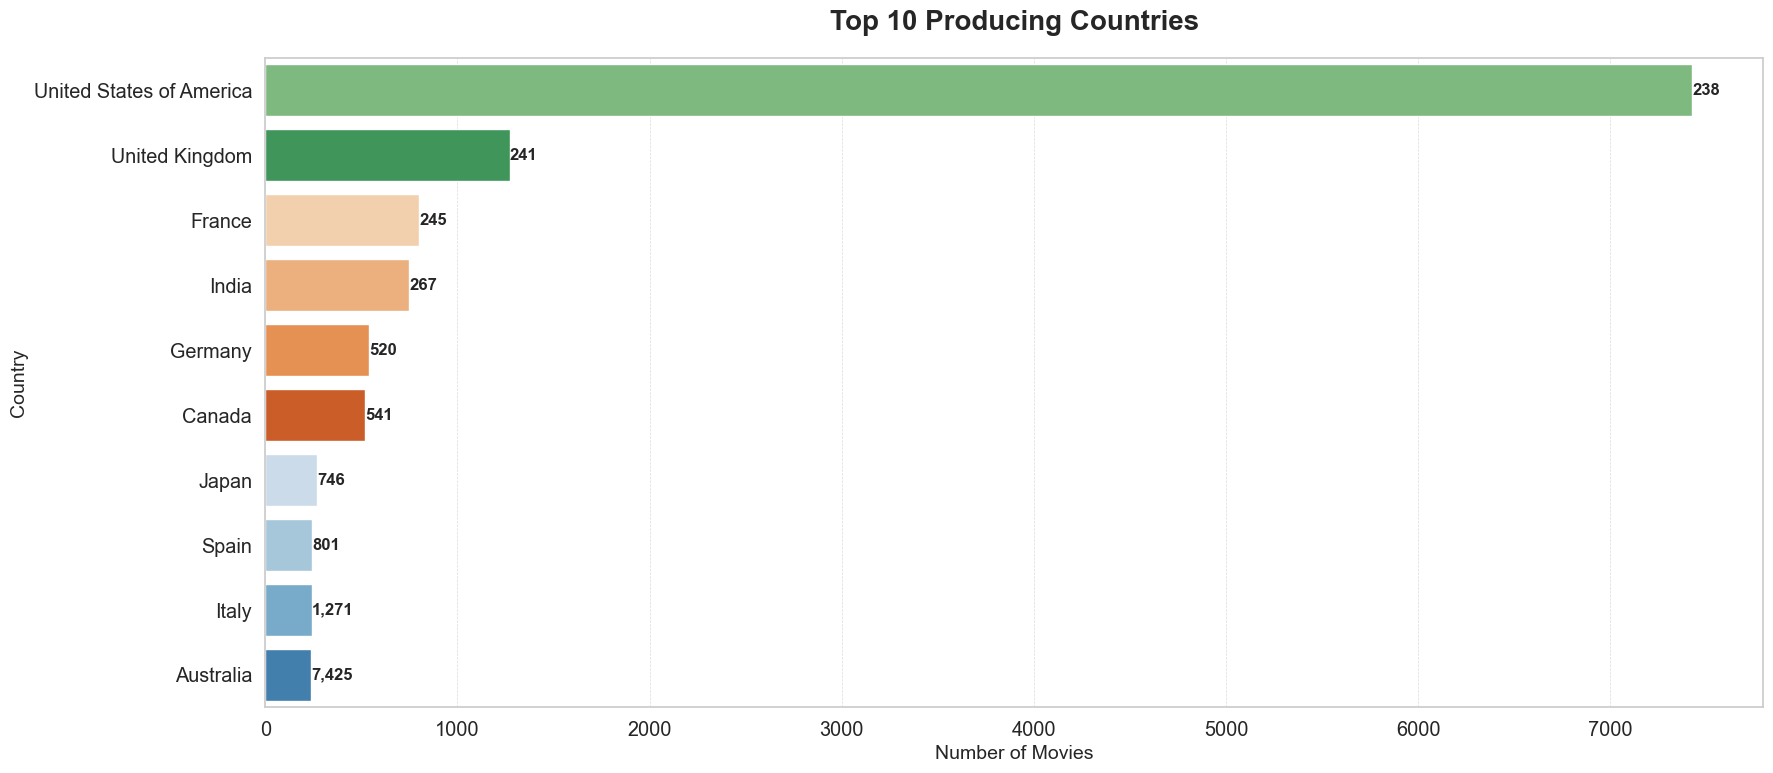

In [39]:
df12 = df1[df1['production_countries'].notna() & (df1['production_countries'] != '[]')].copy()
df12['countries'] = df12['production_countries'].apply(lambda x: [c.strip() for c in x.split(',') if c.strip() and c.strip() != '[]' and c.strip().lower() != 'unknown'])
df_countries_exploded = df12.explode('countries')

country_count = df_countries_exploded['countries'].value_counts().reset_index()
country_count.columns = ['Country', 'Movie_Count']

top10_countries = country_count.head(10)

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)

barplot = sns.barplot(
    x='Movie_Count', 
    y='Country',
    hue='Movie_Count',
    legend=False,
    data=top10_countries, 
    palette='tab20c'
)

for bar, value in zip(barplot.patches, top10_countries['Movie_Count']):
    plt.text(
        bar.get_width() + 2, 
        bar.get_y() + bar.get_height() / 2, 
        f"{value:,}",
        va='center', 
        fontsize=12, 
        weight='bold'
    )

plt.title('Top 10 Producing Countries', fontsize=20, weight='bold', pad=20)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

#### Top 10 Countries by Revenue

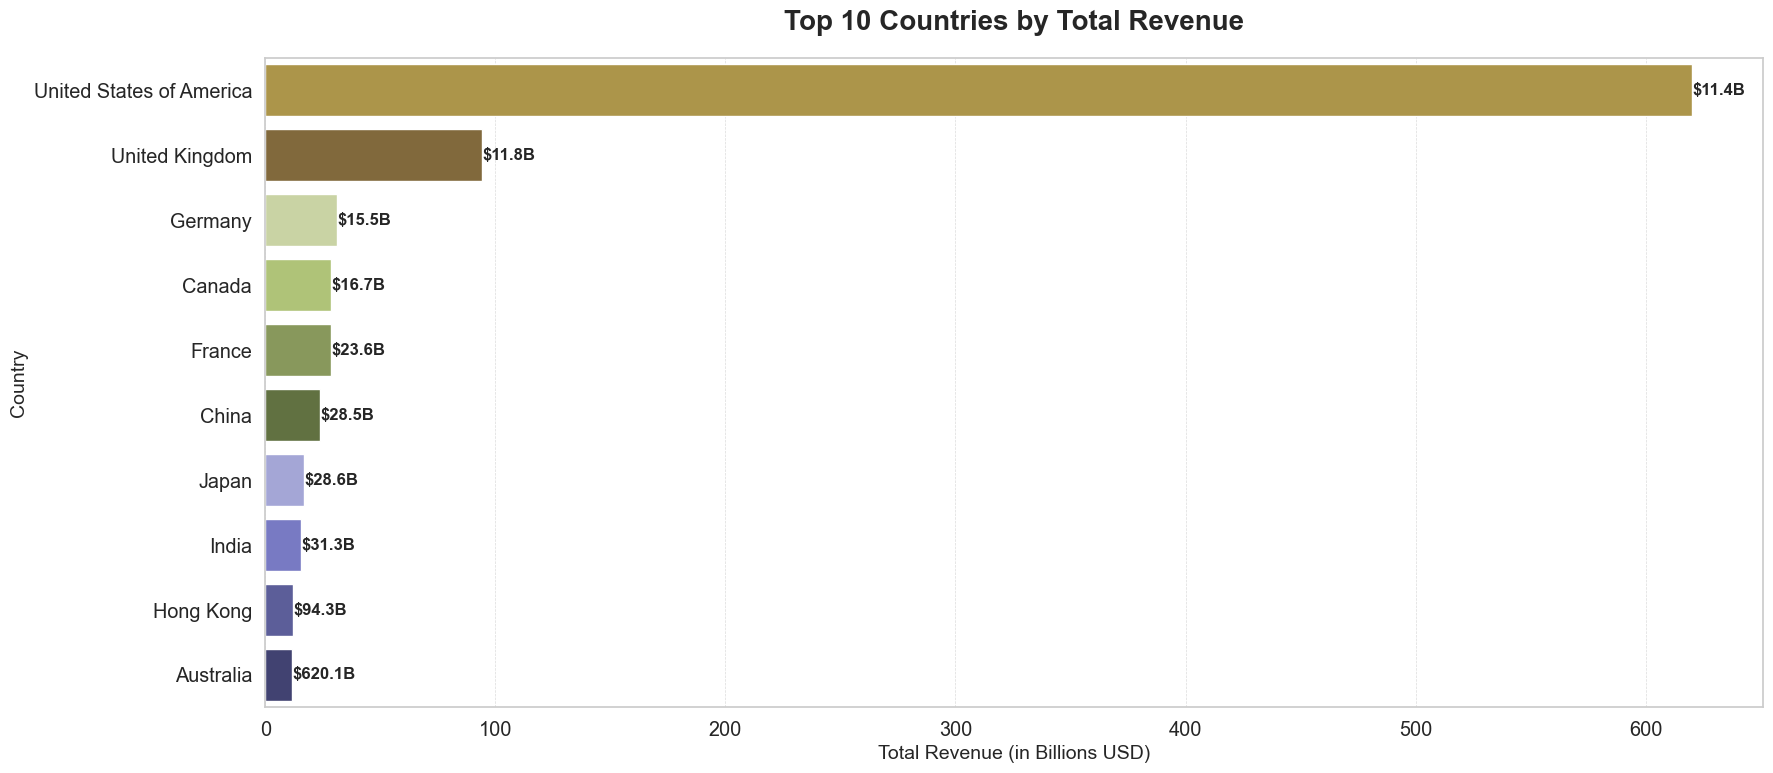

In [40]:
df13 = df1[df1['revenue'].notna() & df1['production_countries'].notna() & (df1['production_countries'] != '[]')].copy()
df13['countries'] = df13['production_countries'].apply(lambda x: [c.strip() for c in x.split(',') if c.strip() and c.strip() != '[]' and c.strip().lower() != 'unknown'])
df_rev_country_exploded = df13.explode('countries')

country_revenue = (df_rev_country_exploded.groupby('countries')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False))
top10_revenue = country_revenue.head(10).copy()

top10_revenue['revenue_billion'] = top10_revenue['revenue'] / 1e9

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.3)

barplot = sns.barplot(
    x='revenue_billion', 
    y='countries',
    hue='revenue_billion',
    legend=False,
    data=top10_revenue, 
    palette='tab20b'
)

for bar, value in zip(barplot.patches, top10_revenue['revenue_billion']):
    plt.text(
        bar.get_width() + 0.2, 
        bar.get_y() + bar.get_height() / 2, 
        f"${value:.1f}B", 
        va='center', 
        fontsize=12, 
        weight='bold'
    )

plt.title('Top 10 Countries by Total Revenue', fontsize=20, weight='bold', pad=20)
plt.xlabel('Total Revenue (in Billions USD)', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

#### Vote Average Distribution

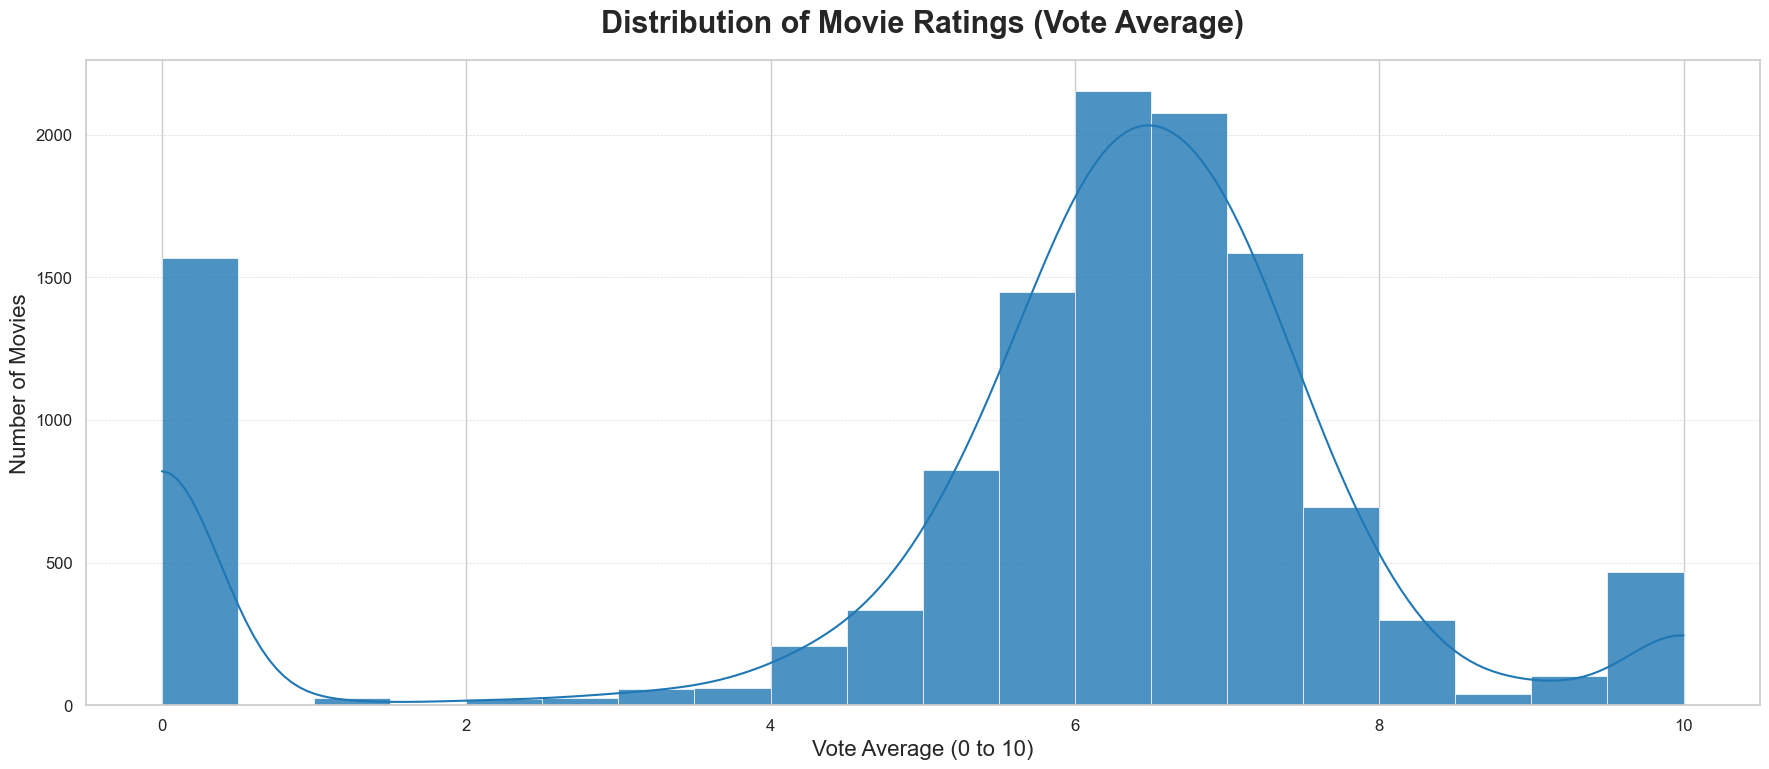

In [41]:
df_votes = df1[df1['vote_average'].notna()].copy()

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.4)

sns.histplot(
    df_votes['vote_average'], 
    bins=20, 
    kde=True, 
    color='#1f77b4', 
    linewidth=0.5, 
    alpha=0.8
)

plt.title('Distribution of Movie Ratings (Vote Average)', fontsize=22, weight='bold', pad=20)
plt.xlabel('Vote Average (0 to 10)', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

#### Revenue vs Popularity

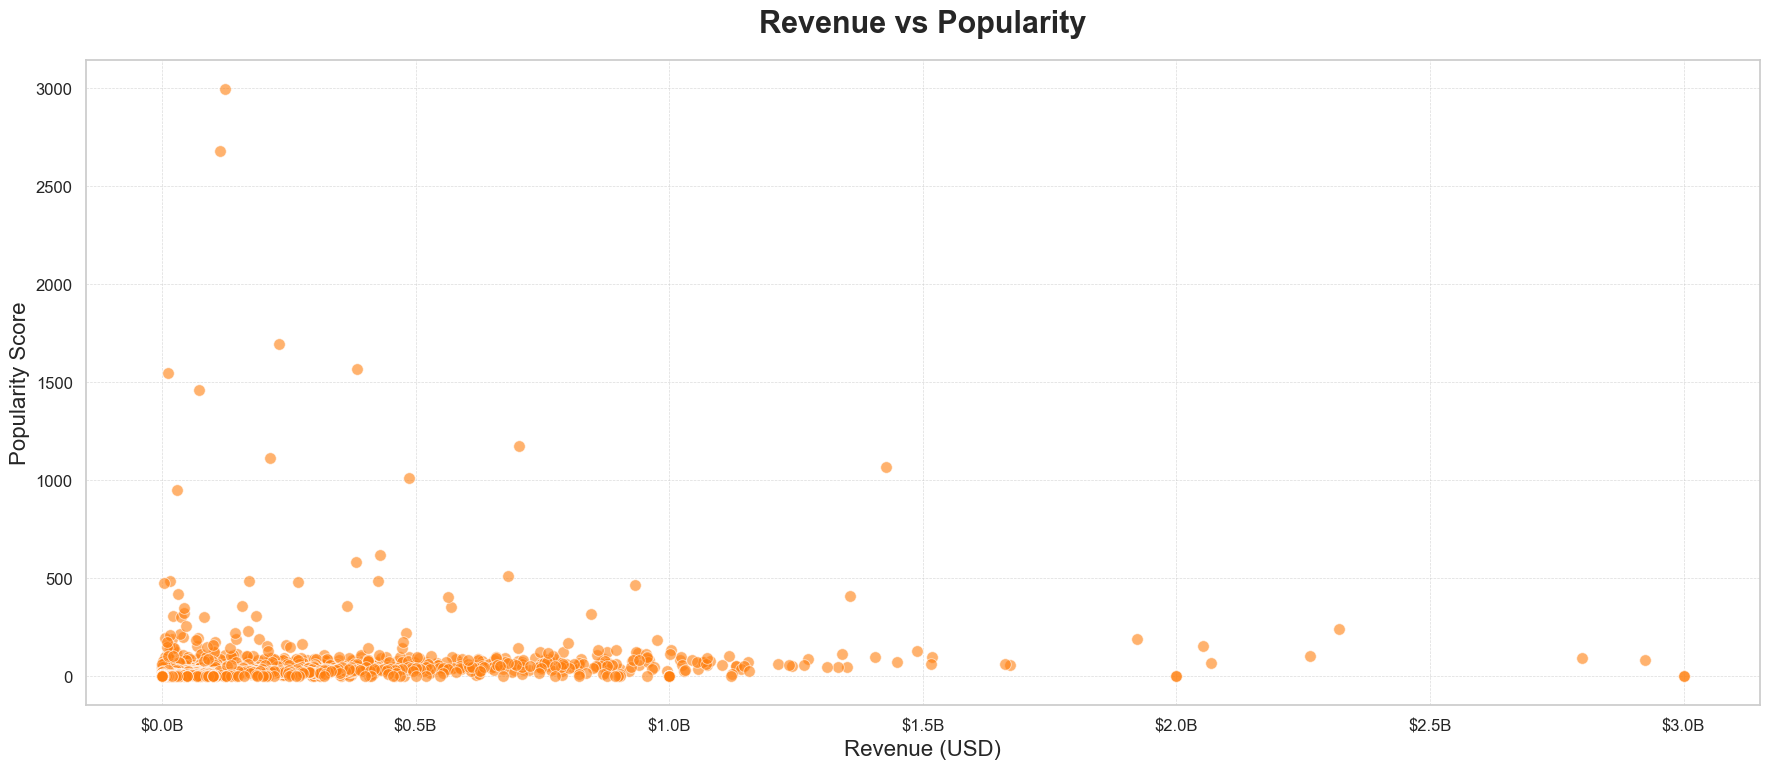

In [42]:
df_pop_rev = df1[df1['popularity'].notna() & df1['revenue'].notna()].copy()

pd.set_option('display.float_format', '{:,.0f}'.format)

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid", font_scale=1.4)

sns.scatterplot(
    x='revenue', 
    y='popularity', 
    data=df_pop_rev, 
    alpha=0.6, 
    s=70, 
    color='#ff7f0e'
)

plt.title('Revenue vs Popularity', fontsize=22, weight='bold', pad=20)
plt.xlabel('Revenue (USD)', fontsize=16)
plt.ylabel('Popularity Score', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e9:.1f}B"))

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()